# Análise de Venda de Medicamentos Controlados e Antimicrobianos - Medicamentos Industrializados

Projeto de análise de vendas de medicamentos controlados e antimicrobianos exclusivamente industrializados na Região Metropolitana da Baixada Santista (RMBS) composta por nove municípios no litoral do estado de São Paulo, através de dados extraídos do Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC) e disponibilizados no [portal de dados abertos](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados) da Agência Nacional de Vigilância Sanitária (Anvisa). Através da análise das informações de vendas, dados geográricos, perfil de pacientes e características de medicamentos, aplicando a metodologia CRISP-DM, o objetivo é extrair insights de negócios, sugerir soluções aos problemas identificados e apresentar propostas de aprimoramento.

## Demanda do negócio

A análise dos dados possibilitará a obtenção de insigths, a identificação de tendências e a proposição de soluções estratégicas. Além disso, esse processo permitirá direcionar recursos de forma mais eficaz para áreas de maior demanda, aprimorando, assim, a gestão logística e o controle de estoque. Para atender a esses objetivos, foi definida as seguintes demandas de negócio:

- Compreender as tendências, padrões e características das vendas farmacêuticas.
- Construção de perfis de pacientes com base nos mendicamentos receitados.
- Compreender a demanda de medicamentos com base no perfil dos pacientes, por tempo e por município.
- Obter insights, identificar oportunidades e propor soluções a problemas.

## Compreensão dos dados

Os dados que serão utilizados na análise compreendem o período de 12 meses do ano de 2019, que integram um conjunto de doze arquivos em formato "CSV". Os dados foram extraídos do Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC), provenientes apenas de farmácias e drogarias privadas que periodicamente devem enviar os dados a respeito de todas as vendas realizadas de medicamentos sujeitos à escrituração no SNGPC. Os dados foram disponibilizados no [portal de dados abertos](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados) da Agência Nacional de Vigilância Sanitária (Anvisa).

## Tópicos da análise

- Construção de perfil de pacientes.
- Distribuição de pacientes por município.
- Demanda de medicamentos por paciente.
- Demanda de medicamentos por município.
- Demanda geral de medicamentos.

## Dicionário de dados

**ANO_VENDA:** Ano da venda do medicamento.<br>
**MES_VENDA:** Mês da venda do medicamento.<br>
**UF_VENDA:** Unidade Federativa do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando a UF onde ocorreu a venda.<br>
**MUNICIPIO_VENDA:** Município do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando o Município onde ocorreu a venda.<br>
**PRINCIPIO_ATIVO:** Nome do princípio ativo do medicamento industrializado, conforme cadastrado no registro do medicamento, no banco de dados da Anvisa.<br>Quando um medicamento tem mais de um princípio ativo, cada um deles é separado pelo caractere “+”.<br>Ex.: “PRINCÍPIO ATIVO 1 + PRINCÍPIO ATIVO 2”<br>
**DESCRICAO_APRESENTACAO:** Uma Apresentação de Medicamento representa O modo como um medicamento é apresentado na embalagem. Exemplo: Medicamento X, pode ter duas apresentações diferentes:<br>• Apresentação 1:<br>Uma caixa com 1 blister de alumínio com 20 comprimidos, cada comprimido com 5 mg de princípio ativo.<br>Nesse caso, a descrição da apresentação seria:<br>“5 MG COM CT BL AL X 20”<br>• Apresentação 2:<br>Uma caixa com 1 frasco de vidro com 50 mL de um xarope, com concentração do princípio ativo de 15 mg por mL.<br>Nesse caso, a descrição da apresentação seria:<br>15MG/ML XPE CT FR VD x 50 ML<br>Esses exemplos representam descrições de apresentações diferentes para um mesmo medicamento.<br>Os termos utilizados na descrição das apresentações seguem o disposto no Vocabulário Controlado da Anvisa, disponível no link:<br>[http://portal.anvisa.gov.br/documents/33836/2501339/Vocabul%C3%A1rio+Controlado/fd8fdf08-45dc-402a-8dcf-fbb3fd21ca75](http://portal.anvisa.gov.br/documents/33836/2501339/Vocabul%C3%A1rio+Controlado/fd8fdf08-45dc-402a-8dcf-fbb3fd21ca75)<br>
**QTD_VENDIDA:** Quantidade vendida de caixas ou frascos do medicamento.<br>
**UNIDADE_MEDIDA:** Indica se a quantidade vendida do medicamento foi de caixas ou frascos.<br>
**CONSELHO_PRESCRITOR:** Conselho de Classe do profissional que prescreveu o medicamento vendido.<br>
**UF_CONSELHO_PRESCRITOR:** Unidade Federativa do Conselho de Classe do profissional que prescreveu o medicamento vendido.<br>
**TIPO_RECEITUARIO:** Tipo de receituário utilizado na prescrição.<br>Valores e respectivos tipos de receituário:<br>1 – Receita de Controle Especial em 2 vias (Receita Branca);<br>2 – Notificação de Receita B (Notificação Azul);<br>3 – Notificação de Receita Especial (Notificação Branca);<br>4 – Notificação de Receita A (Notificação Amarela);<br>5 – Receita Antimicrobiano em 2 vias.<br>
**CID10:** Classificação Internacional de Doença (aplicável apenas a medicamentos antimicrobianos).<br>
**SEXO:** Sexo do paciente (aplicável apenas a medicamentos antimicrobianos).<br>Valor 1 para o sexo masculino, valor 2 para o sexo feminino.<br>
**IDADE:** Valor numérico que representa a idade do paciente, em meses ou anos (aplicável apenas a medicamentos antimicrobianos).<br>
**UNIDADE_IDADE:** Unidade de medida da idade do paciente, que pode ser em meses ou anos (aplicável apenas a medicamentos antimicrobianos).<br>Valor 1 para unidade de medida em anos, valor 2 para unidade de medida em meses.<br>

## Sumário

1. **Importação de bibliotecas**
2. **Carregamento dos dados**
3. **Análise do dataframe**
4. **Limpeza e pré-processamento dos dados**
   - 4.1. Análise de registros duplicados
   - 4.2. Análise e tratamento de valores nulos
     - Tratando valores nulos da coluna PRINCIPIO_ATIVO
     - Tratando valores nulos da coluna CID10
     - Tratando valores nulos da coluna SEXO
     - Tratando valores nulos da coluna IDADE
     - Tratando valores nulos da coluna UNIDADE_IDADE
   - 4.3. Análise de tipo dos dados
   - 4.4. Análise da cardinalidade
5. **Análise das medidas estatísticas dos dados**
   - 5.1. Distribuição dos dados em gráfico boxplot
   - 5.2. Análise dos outliers identificados
   - 5.3. Distribuição dos dados em gráfico histograma
   - 5.4. Distribuição dos dados em gráfico de barras
6. **Análise exploratória dos dados**
   - 6.1. Construção de perfil de pacientes
     - Qual é a faixa etária dos pacientes que compram medicamentos controlados?
     - Há uma diferença significativa entre pacientes do sexo masculino e feminino?
     - Existe uma diferença significativa na idade dos pacientes com base no sexo?
     - Quais são os tipos de receituário mais comuns entre os pacientes?
     - Qual a distribuição entre os tipos de receituário por sexo dos pacientes?
     - Qual a distribuição entre os tipos de receituário por faixa etária dos pacientes?
   - 6.2. Distribuição de pacientes por município
     - Qual é a distribuição em cada município dos pacientes que compram medicamentos controlados?
     - Qual é a idade média dos pacientes em cada município?
     - Quais são as faixas etárias predominantes em cada município?
     - Qual é a distribuição de sexo e faixa etária dos pacientes em cada município?
   - 6.3. Demanda de medicamentos por paciente
     - Há uma diferença na demanda de medicamentos entre pacientes do sexo masculino e feminino?
     - Qual é a distribuição entre a faixa etária dos pacientes e a quantidade de medicamentos vendidos?
     - Existe alguma disparidade na demanda de medicamentos controlados com base no sexo e no tipo de receituário?
     - Como foi a demanda de medicamentos controlados com base na faixa etária e no tipo de receituário?
     - Como a demanda de medicamentos varia em diferentes faixas etárias ao longo do ano?
     - Como a demanda de medicamentos varia em diferentes sexos ao longo do ano?
   - 6.4. Demanda de medicamentos por município
     - Qual é a demanda total de medicamentos controlados em cada município?
     - Existe uma sazonalidade na demanda de medicamentos em diferentes municípios?
   - 6.5. Demanda geral de medicamentos
     - Quais medicamentos são mais procurados pelos pacientes?
     - Quais remédios são mais solicitados com base no gênero dos pacientes?
     - Quais medicamentos são demandados por diferentes faixas etárias?
     - Quais medicamentos têm maior saída em vendas?
     - Quais remédios são mais requisitados em cada município?
7. **Conclusão**


---

## 1. Importação de bibliotecas


In [1]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc  # Garbage collector para gerenciamento de memória
import funcoes as fn  # Módulo customizado contendo funções adicionais

# Configurações para exibição de dados no Jupyter Notebook
# Configurar opção para exibir todas as linhas do DataFrame
pd.set_option('display.max_rows', None)

# Configurar para exibir o conteúdo completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurações para suprimir mensagens de aviso durante a execução
warnings.filterwarnings('ignore')

# Configuração do estilo dos gráficos usando o seaborn
sns.set_style('darkgrid')

# Definição da paleta de cores a ser usada nos gráficos
palette = sns.color_palette(['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854',
                            '#ffd92f', '#64B5F6', '#E57373', '#e5c494', '#b3b3b3', '#06B6D4', '#8D6E63'])

## 2. Carregamento dos dados


In [2]:
# Efetuando a limpeza de memória antes do carregamento dos dados
gc.collect()

# Caminho do arquivo de dados
caminho = 'dados/ABT/00/'

# Criando um dataframe a partir dos arquivos no diretório de dados
df = pd.read_parquet(caminho, engine='pyarrow')

## 3. Análise do dataframe


In [3]:
# Informações do dataframe como nome das colunas, contagem de
# de dados, tipo de dados e quantidade de memória utilizada

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737718 entries, 0 to 737717
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   ANO_VENDA               737718 non-null  int32   
 1   MES_VENDA               737718 non-null  int32   
 2   UF_VENDA                737718 non-null  object  
 3   MUNICIPIO_VENDA         737718 non-null  object  
 4   PRINCIPIO_ATIVO         737402 non-null  object  
 5   DESCRICAO_APRESENTACAO  737718 non-null  object  
 6   QTD_VENDIDA             737718 non-null  int32   
 7   UNIDADE_MEDIDA          737718 non-null  object  
 8   CONSELHO_PRESCRITOR     737718 non-null  object  
 9   UF_CONSELHO_PRESCRITOR  737718 non-null  object  
 10  TIPO_RECEITUARIO        737718 non-null  object  
 11  CID10                   0 non-null       object  
 12  SEXO                    639708 non-null  float64 
 13  IDADE                   639708 non-null  float64 
 14  UNID

In [4]:
# Exibindo a quantidade de linhas e colunas do dataframe

print(f'\nVOLUMETRIA')
print(f'\nQuantidade de linhas (registros):  {df.shape[0]}')
print(f'\nQuantidade de colunas (variáveis): {df.shape[1]}')


VOLUMETRIA

Quantidade de linhas (registros):  737718

Quantidade de colunas (variáveis): 17


In [5]:
# Agrupar o DataFrame por 'ANO_VENDA' e 'MES_VENDA' e contar o número de registros em cada grupo
df_ano_mes = df.groupby(['ANO_VENDA', 'MES_VENDA']).size()

# Criar um novo DataFrame para armazenar os resultados e renomear a coluna resultante para 'Quantidade'
df_ano_mes = pd.DataFrame(df_ano_mes).rename(columns={0: 'Quantidade'})

# Calcular a porcentagem de registros para cada ano/mês em relação ao total
df_ano_mes['%'] = round(df_ano_mes['Quantidade'] /
                        df_ano_mes['Quantidade'].sum() * 100, 2)

# Exibir o DataFrame resultante
df_ano_mes

Quantidade     %
ANO_VENDA MES_VENDA                  
2019      1               63284  8.58
          2               56937  7.72
          3               62116  8.42
          4               61866  8.39
          5               64058  8.68
          6               61664  8.36
          7               60510  8.20
          8               60828  8.25
          9               60671  8.22
          10              64807  8.78
          11              60728  8.23
          12              60249  8.17

In [6]:
# Primeiras linhas do dataframe

df.head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE,DATA_PROC,DATA_REF
0,2019,1,SP,SANTOS,AZITROMICINA DI-HIDRATADA,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,1,CAIXA,CRM,SP,5,None,2.0,44.0,1.0,2024-02-14,2019-01-01
1,2019,1,SP,SANTOS,AZITROMICINA DI-HIDRATADA,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,4,CAIXA,CRM,SP,5,None,2.0,45.0,1.0,2024-02-14,2019-01-01
2,2019,1,SP,SANTOS,AZITROMICINA DI-HIDRATADA,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,2,CAIXA,CRM,SP,5,None,2.0,46.0,1.0,2024-02-14,2019-01-01
3,2019,1,SP,SANTOS,AZITROMICINA DI-HIDRATADA,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,2,CAIXA,CRM,SP,5,None,2.0,47.0,1.0,2024-02-14,2019-01-01
4,2019,1,SP,SANTOS,AZITROMICINA DI-HIDRATADA,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,4,CAIXA,CRM,SP,5,None,2.0,48.0,1.0,2024-02-14,2019-01-01


In [7]:
# Últimas linhas do dataframe

df.tail()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE,DATA_PROC,DATA_REF
737713,2019,12,SP,PERUÍBE,ÁCIDO FUSÍDICO + VALERATO DE BETAMETASONA,20 MG/G + 1 MG/G CREM DERM CT BG AL X 15 G,1,CAIXA,CRM,SP,5,None,2.0,9.0,1.0,2024-02-14,2019-12-01
737714,2019,12,SP,PERUÍBE,ÁCIDO VALPRÓICO,250 MG CAP MOLE CT FR VD AMB X 25,20,CAIXA,CRM,SP,1,None,NaN,NaN,NaN,2024-02-14,2019-12-01
737715,2019,12,SP,PERUÍBE,ÁCIDO VALPRÓICO,250 MG CAP MOLE OR CT FR VD AMB X 25,3,CAIXA,CRM,SP,1,None,NaN,NaN,NaN,2024-02-14,2019-12-01
737716,2019,12,SP,PERUÍBE,ÁCIDO VALPRÓICO + VALPROATO DE SÓDIO,300 MG COM REV LIB PROL CT BL AL/AL X 30,3,CAIXA,CRM,SP,1,None,NaN,NaN,NaN,2024-02-14,2019-12-01
737717,2019,12,SP,PERUÍBE,ÁCIDO VALPRÓICO + VALPROATO DE SÓDIO,500 MG COM REV LIB PROL CT BL AL/AL X 30,5,CAIXA,CRM,SP,1,None,NaN,NaN,NaN,2024-02-14,2019-12-01


In [8]:
# Exibindo os metadados

fn.gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,ANO_VENDA,int32,0,0.00,1
1,MES_VENDA,int32,0,0.00,12
2,UF_VENDA,object,0,0.00,1
3,MUNICIPIO_VENDA,object,0,0.00,9
4,PRINCIPIO_ATIVO,object,316,0.04,301
5,DESCRICAO_APRESENTACAO,object,0,0.00,1867
6,QTD_VENDIDA,int32,0,0.00,625
7,UNIDADE_MEDIDA,object,0,0.00,2
8,CONSELHO_PRESCRITOR,object,0,0.00,4
9,UF_CONSELHO_PRESCRITOR,object,0,0.00,27


Os dados no formato _Parquet_ foram consolidados em um dataframe com dimensões de **737.718** _linhas_ e **17** _colunas_. Antes de iniciar qualquer tipo de tratamento e pré-processamento dos dados, a próxima etapa consistirá em garantir que o conjunto de dados seja íntegro e possa ser utilizado de maneira coerente nas análises de dados, bem como na extração de resultados. Para isso, serão analisados e, se aplicável, será realizado o devido tratamento para a existência de registros duplicados, dados nulos, tipagem dos dados e cardinalidade. A tabela acima já demonstra que será necessário aplicar um pré-processamento dos dados. Este processo é fundamental para assegurar a qualidade e confiabilidade das informações antes de prosseguir com análises mais aprofundadas.

## 4. Limpeza e pré-processamento dos dados


### 4.1. Análise de registros duplicados


In [9]:
# Exibindo a quantidade de registros duplicados

df.duplicated(keep='first').value_counts().to_frame().rename(
    columns={'count': 'Quantidade'})

,Quantidade
False,737718


Não foram identificados registros duplicados, indicando que não ocorreram lançamentos de vendas duplicados no conjunto de dados. Essa consistência nas entradas é essencial para garantir a precisão das análises subsequentes.

### 4.2. Análise e tratamento de valores nulos


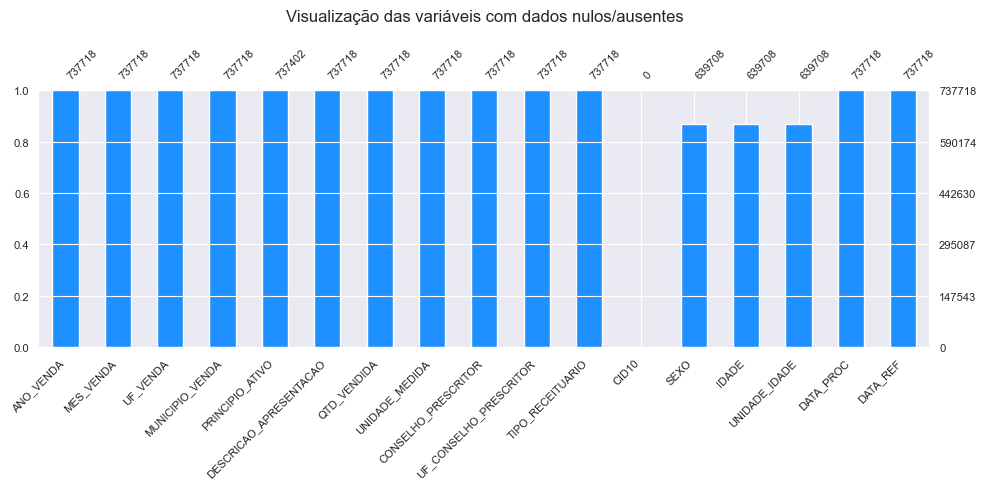

In [10]:
# Exibição gráfica de valores nulos

fn.grafico_bar_valores_nulos(df)

* #### Tratando valores nulos da coluna PRINCIPIO_ATIVO

In [11]:
# Exibindo a quantidade de valore nulos da variável 'PRINCIPIO_ATIVO'

fn.exibe_quantidade_nulos(df,'PRINCIPIO_ATIVO')


Quantidade de registros nulos na coluna PRINCIPIO_ATIVO: 316 (0.04 %)


In [12]:
# Cria um dataframe somente com os registros onde o valor da coluna 'PRINCIPIO_ATIVO'
# é nulo e a coluna 'DESCRICAO_APRESENTACAO' não é nulo
df_nulls = df[df['PRINCIPIO_ATIVO'].isnull() & ~df['DESCRICAO_APRESENTACAO'].isnull()]

# Cria e exibe a quantidade de valores nulos da coluna 'PRINCIPIO_ATIVO' com base no
# agrupamento com a coluna 'DESCRICAO_APRESENTACAO'
df_nulls = df_nulls.groupby(['DESCRICAO_APRESENTACAO']).size() \
    .reset_index(name='Quantidade')

# Exibe o DataFrame resultante
df_nulls

,DESCRICAO_APRESENTACAO,Quantidade
0,10 MG COM CT BL AL/AL X 30,30
1,10 MG COM REV CT BL AL/AL X 30,38
2,10 MG COM REV CT BL AL/AL X 60,18
3,20 MG COM REV CT BL AL/AL X 30,27
4,20 MG COM REV CT BL AL/AL X 60,18
5,250MG/5MLPO PREP EXTEMP CT FR VD AMB X 100 ML,1
6,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,71
7,"37,5 MG CAP GEL DURA LIB PROL CT BL PLAS OPC X 30",24
8,50 MG COM CX 2 BL AL PLAS INC X 15,11
9,50 MG/G + 5 MG/G POM DERM CT BG AL X 30 G,2


In [13]:
# Obter a lista única de sexo na coluna 'DESCRICAO_APRESENTACAO'
descricao_unicos = np.unique(df_nulls['DESCRICAO_APRESENTACAO'])

# Iterando sobre a 'DESCRICAO_APRESENTACAO'
for descricao in descricao_unicos:
    try:
        # Filtra o DataFrame para as linhas onde a coluna 'DESCRICAO_APRESENTACAO' é igual ao valor atual
        df_temp = df[df['DESCRICAO_APRESENTACAO'] == descricao]
        
        # Calcula a moda da coluna 'PRINCIPIO_ATIVO' para o subconjunto filtrado
        moda_principio_ativo = df_temp['PRINCIPIO_ATIVO'].mode()[0]
        
        # Substitui os valores nulos da coluna 'PRINCIPIO_ATIVO' pelo valor da moda no subconjunto filtrado
        df.loc[(df['DESCRICAO_APRESENTACAO'] == descricao) & (
            df['PRINCIPIO_ATIVO'].isnull()), 'PRINCIPIO_ATIVO'] = moda_principio_ativo
        
    except:
        # Em caso de erro, continua para a próxima iteração
        continue

# Exibe a quantidade de valores nulos na coluna 'PRINCIPIO_ATIVO'
fn.exibe_quantidade_nulos(df, 'PRINCIPIO_ATIVO')


Quantidade de registros nulos na coluna PRINCIPIO_ATIVO: 110 (0.01 %)


In [14]:
# Apagando os registros nulos restantes
df = df.dropna(subset=['PRINCIPIO_ATIVO'])

# Exibe a quantidade de valores nulos na coluna 'PRINCIPIO_ATIVO'
fn.exibe_quantidade_nulos(df, 'PRINCIPIO_ATIVO')


Quantidade de registros nulos na coluna PRINCIPIO_ATIVO: 0 (0.0 %)


A solução adotada para corrigir a ausência de dados na variável **PRINCIPIO_ATIVO** baseou-se na moda (valor mais frequente) da coluna **DESCRICAO_APRESENTACAO**, considerando também a coluna **PRINCIPIO_ATIVO**, para preencher os campos nulos. Os registros restantes, nos quais os valores são nulos, foram excluídos da análise. Essa ação não impactará o conjunto de dados destinado à análise, uma vez que os registros excluídos não possuíam informações válidas.

* #### Tratando valores nulos da coluna CID10

In [15]:
# Exibe a quantidade de valores nulos na coluna 'CID10'

fn.exibe_quantidade_nulos(df,'CID10')


Quantidade de registros nulos na coluna CID10: 737608 (100.0 %)


In [16]:
# Apagando a coluna 'CID10'
df = df.drop(columns='CID10')

# Exibe a quantidade de valores nulos na coluna 'CID10'
fn.exibe_quantidade_nulos(df,'CID10')


Coluna CID10 não existe ou foi apagada.


Os valores presentes na coluna **CID10** deveriam representar classificações internacionais de doenças. No entanto, todos esses valores estão ausentes, impossibilitando sua utilização na análise. Como resultado, a coluna **CID10** foi completamente descartada do conjunto de dados. A ausência de dados nessa coluna não compromete a qualidade da análise, uma vez que a mesma não continha informações.

* #### Tratando valores nulos da coluna SEXO

In [17]:
# Exibe a quantidade de valores nulos na coluna 'SEXO'

fn.exibe_quantidade_nulos(df,'SEXO')


Quantidade de registros nulos na coluna SEXO: 97940 (13.28 %)


In [18]:
# Cria um DataFrame somente com os registros onde o valor da coluna 'SEXO'
# é nulo e a coluna 'CONSELHO_PRESCRITOR' não é nulo
df_nulls = df[df['SEXO'].isnull() & ~df['CONSELHO_PRESCRITOR'].isnull()]

# Cria um novo DataFrame agrupando os registros pelo valor da coluna 'CONSELHO_PRESCRITOR'
# e contando a quantidade de ocorrências em cada grupo
df_nulls = df_nulls.groupby(['CONSELHO_PRESCRITOR']).size().reset_index(name='Quantidade')

# Exibe o DataFrame resultante
df_nulls

,CONSELHO_PRESCRITOR,Quantidade
0,CRM,72335
1,CRMV,15871
2,CRO,6835
3,RMS,2899


In [19]:
# Com base no valor CRMV da coluna 'CONSELHO_PRESCRITOR' os valores nulos da
# coluna 'SEXO' são substituídos pelo valor 3
df.loc[(df['CONSELHO_PRESCRITOR'] == 'CRMV')
       & (df['SEXO'].isnull()), 'SEXO'] = 3

# Exibe a quantidade de valores nulos na coluna 'SEXO''
fn.exibe_quantidade_nulos(df, 'SEXO')


Quantidade de registros nulos na coluna SEXO: 82069 (11.13 %)


In [20]:
# Com base na coluna 'SEXO' os valores nulos são substituídos pela sua moda
moda_sexo = df['SEXO'].mode()[0]
df['SEXO'].fillna(moda_sexo, inplace=True)

# Exibe a quantidade de valores nulos na coluna 'SEXO'
fn.exibe_quantidade_nulos(df,'SEXO')


Quantidade de registros nulos na coluna SEXO: 0 (0.0 %)


A abordagem adotada para lidar com valores nulos na coluna **SEXO** consiste na substituição desses valores pelo código **3**. Essa decisão é baseada na análise do valor **CRMV** (Conselho Regional de Medicina Veterinária) presente na coluna **CONSELHO_PRESCRITOR**. Quando o **CRMV** está presente, indica que a prescrição foi feita por um médico veterinário para um animal. Nessas situações, o campo **SEXO** não é preenchido, refletindo a natureza específica das prescrições veterinárias.

* #### Tratando valores nulos da coluna IDADE

In [21]:
# Exibe a quantidade de valores nulos na coluna 'IDADE'

fn.exibe_quantidade_nulos(df, 'IDADE')


Quantidade de registros nulos na coluna IDADE: 97940 (13.28 %)


In [22]:
# Cria um DataFrame somente com os registros onde o valor da coluna 'IDADE'
# é nulo e a coluna 'CONSELHO_PRESCRITOR' não é nulo
df_nulls = df[df['IDADE'].isnull() & ~df['CONSELHO_PRESCRITOR'].isnull()]

# Cria um novo DataFrame agrupando os registros pelo valor da coluna 'SEXO'
# e contando a quantidade de ocorrências em cada grupo
df_nulls = df_nulls.groupby(['SEXO']).size().reset_index(name='Quantidade')

# Exibe o DataFrame resultante
df_nulls

,SEXO,Quantidade
0,2.0,82069
1,3.0,15871


In [23]:
# Substitui os valores nulos da coluna 'IDADE' por -1 
# para registros onde o valor da coluna 'SEXO' é 3
df.loc[df['SEXO'] == 3, 'IDADE'] = -1

# Calcula a média da coluna 'IDADE' excluindo os valores -1
media_idade = df[df['IDADE'] != -1]['IDADE'].median()

# Preenche os valores nulos da coluna 'IDADE' com a média calculada
df['IDADE'].fillna(media_idade, inplace=True)

# Exibe a quantidade de valores nulos na coluna 'IDADE'
fn.exibe_quantidade_nulos(df, 'IDADE')



Quantidade de registros nulos na coluna IDADE: 0 (0.0 %)


A estratégia adotada para lidar com valores nulos na coluna **IDADE** consiste na substituição desses valores pelo código **-1**. Essa escolha é baseada na análise do valor **3** presente na coluna **SEXO**, o qual é atribuído quando as receitas cadastradas foram prescritas por um médico veterinário e destinadas a animais. Em tais situações, é comum que o campo **IDADE** não seja preenchido.

* #### Tratando valores nulos da coluna UNIDADE_IDADE

In [24]:
# Exibe a quantidade de valores nulos na coluna 'UNIDADE_IDADE'

fn.exibe_quantidade_nulos(df, 'UNIDADE_IDADE')


Quantidade de registros nulos na coluna UNIDADE_IDADE: 97940 (13.28 %)


In [25]:
# Com base no valor 2 da coluna 'UNIDADE_IDADE' os valores da
# coluna IDADE são substituídos pela divisão de IDADE por 12
df.loc[df['UNIDADE_IDADE'] == 2, 'IDADE'] /= 12

# Com base no valor NULL da coluna 'UNIDADE_IDADE' os valores da
# coluna IDADE são substituídos pela divisão de IDADE por 12
#df.loc[(df['UNIDADE_IDADE'].isnull()) & (df['IDADE'] <= 11), 'IDADE'] /= 12

In [26]:
# Apagando a coluna 'UNIDADE_IDADE'
df = df.drop(columns='UNIDADE_IDADE')

# Exibe a quantidade de valores nulos na coluna 'UNIDADE_IDADE'
fn.exibe_quantidade_nulos(df, 'UNIDADE_IDADE')


Coluna UNIDADE_IDADE não existe ou foi apagada.


Na coluna **UNIDADE_IDADE**, o valor **2** indica que a medida na coluna **IDADE** é definida em meses. Com base nessa informação, é realizado um cálculo para converter os valores em meses da coluna **IDADE** para anos. Quando a coluna **IDADE** possui valores até 11 meses e há valores nulos na coluna **UNIDADE_IDADE**, é efetuado o cálculo para essa conversão em anos. Essa abordagem assegura a consistência dos dados, expressando-os na unidade apropriada para análise.

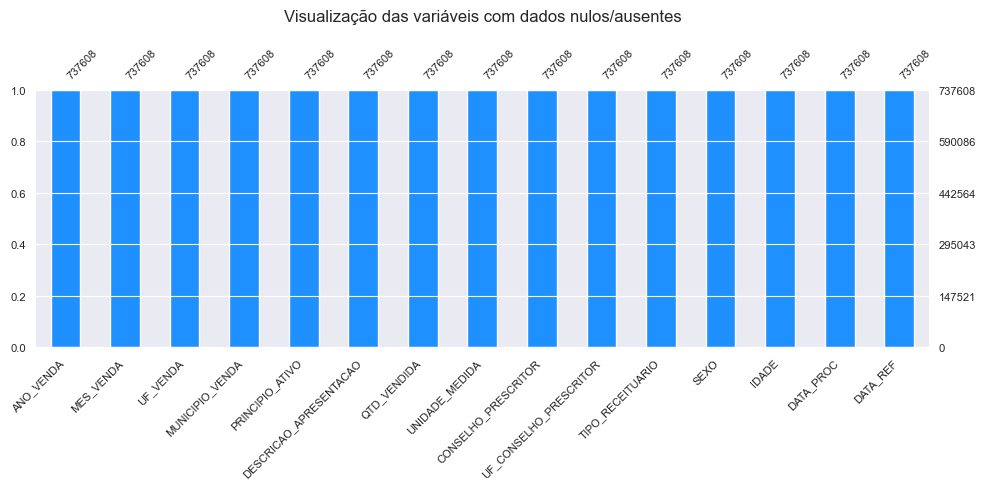

In [27]:
# Exibição gráfica de valores nulos

fn.grafico_bar_valores_nulos(df)

O gráfico acima demonstra que não há mais dados nulos/ausentes. Durante a análise de cada variável, foram realizados os processos de imputação de dados, preenchimento baseado em estatísticas dos dados e remoção de registros e colunas nos quais não foi possível solucionar a ausência de dados. Essas etapas visam garantir que o conjunto de dados esteja completo e seja mais adequado para análises subsequentes, proporcionando uma base mais sólida e confiável para interpretação dos resultados.

### 4.3. Análise de tipo dos dados

In [28]:
# Listando os tipos dos dados

df.dtypes.to_frame().rename(columns={0: 'Tipo'})

,Tipo
ANO_VENDA,int32
MES_VENDA,int32
UF_VENDA,object
MUNICIPIO_VENDA,object
PRINCIPIO_ATIVO,object
DESCRICAO_APRESENTACAO,object
QTD_VENDIDA,int32
UNIDADE_MEDIDA,object
CONSELHO_PRESCRITOR,object
UF_CONSELHO_PRESCRITOR,object


In [29]:
# Transforma a coluna 'ANO_VENDA' para o tipo de dados int32
df['ANO_VENDA'] = df['ANO_VENDA'].astype('int32')

# Transforma a coluna 'MES_VENDA' para o tipo de dados int8
df['MES_VENDA'] = df['MES_VENDA'].astype('int8')

# Mapeia os valores da coluna 'SEXO' para 'Masculino', 'Feminino' e 'Não declarado'
df['SEXO'] = df['SEXO'].map({1: 'Masculino', 2: 'Feminino', 3: 'Não declarado'})

# Transforma a coluna 'TIPO_RECEITUARIO' para o tipo de dados int8
df['TIPO_RECEITUARIO'] = df['TIPO_RECEITUARIO'].astype('int8')

# Converte a coluna 'DATA_PROC' para o formato datetime
df['DATA_PROC'] = pd.to_datetime(df['DATA_PROC'])

# Remove espaços em branco e converte a coluna 'DATA_REF' para o formato datetime
df['DATA_REF'] = df['DATA_REF'].str.strip()
df['DATA_REF'] = pd.to_datetime(df['DATA_REF'], format='%Y-%m-%d', errors='coerce')

In [30]:
# Exibindo os metadados

fn.gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,ANO_VENDA,int32,0,0.0,1
1,MES_VENDA,int8,0,0.0,12
2,UF_VENDA,object,0,0.0,1
3,MUNICIPIO_VENDA,object,0,0.0,9
4,PRINCIPIO_ATIVO,object,0,0.0,301
5,DESCRICAO_APRESENTACAO,object,0,0.0,1858
6,QTD_VENDIDA,int32,0,0.0,625
7,UNIDADE_MEDIDA,object,0,0.0,2
8,CONSELHO_PRESCRITOR,object,0,0.0,4
9,UF_CONSELHO_PRESCRITOR,object,0,0.0,27


A adequação dos tipos de dados das variáveis, assim como o mapeamento e modificação dos dados, permitirá a execução de uma análise mais acurada. Isso resultará na geração de tabelas de valores, estatísticas e gráficos que demonstrarão de forma mais clara e precisa as descobertas das análises, facilitando sua interpretação.

### 4.4. Análise da cardinalidade


In [31]:
def exibe_valores_unicos(df, colunas, qtde_unicos):
    '''
    Exibe a quantidade de valores únicos de coluna(s) específica(s).

    :param df: DataFrame
        DataFrame a ser analisado.
    :param colunas: list
        Lista de colunas a ser analisada.
    :param qtde_unicos: int
        Quantidade máxima de valores únicos para exibição.
    :return: None
    '''
    # Itera sobre as colunas especificadas
    for col in colunas:
        # Verifica se o número de valores únicos é menor ou igual ao limite especificado
        if df[col].nunique() <= qtde_unicos:
            # Cria um DataFrame com a contagem de valores únicos
            coluna_qtde = pd.DataFrame(df[col].value_counts().sort_index())
            
            # Renomear colunas
            coluna_qtde = coluna_qtde.rename(columns={col: 'Quantidade'})
            
            # Transpõe o resultado
            coluna_qtde = coluna_qtde.T
            
            # Exibe o DataFrame
            display(coluna_qtde)


# Obtém as colunas do DataFrame
cols = df.columns

# Define a quantidade máxima de valores únicos a serem exibidos
qtde_unicos = 12

# Chama a função para exibir os valores únicos das colunas
exibe_valores_unicos(df, cols, qtde_unicos)

ANO_VENDA,2019
count,737608


MES_VENDA,1,2,3,4,5,6,7,8,9,10,11,12
count,63279,56933,62107,61856,64048,61651,60499,60815,60658,64801,60722,60239


UF_VENDA,SP
count,737608


MUNICIPIO_VENDA,BERTIOGA,CUBATÃO,GUARUJÁ,ITANHAÉM,MONGAGUÁ,PERUÍBE,PRAIA GRANDE,SANTOS,SÃO VICENTE
count,25864,43918,100958,39386,29791,42338,121208,224645,109500


UNIDADE_MEDIDA,CAIXA,FRASCO
count,680828,56780


CONSELHO_PRESCRITOR,CRM,CRMV,CRO,RMS
count,645575,15871,71635,4527


TIPO_RECEITUARIO,1,2,3,4,5
count,88739,14839,1896,2249,629885


SEXO,Feminino,Masculino,Não declarado
count,437080,284657,15871


DATA_PROC,2024-02-14
count,737608


DATA_REF,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
count,63279,56933,62107,61856,64048,61651,60499,60815,60658,64801,60722,60239


In [32]:
# Exibindo os metadados

fn.gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,ANO_VENDA,int32,0,0.0,1
1,MES_VENDA,int8,0,0.0,12
2,UF_VENDA,object,0,0.0,1
3,MUNICIPIO_VENDA,object,0,0.0,9
4,PRINCIPIO_ATIVO,object,0,0.0,301
5,DESCRICAO_APRESENTACAO,object,0,0.0,1858
6,QTD_VENDIDA,int32,0,0.0,625
7,UNIDADE_MEDIDA,object,0,0.0,2
8,CONSELHO_PRESCRITOR,object,0,0.0,4
9,UF_CONSELHO_PRESCRITOR,object,0,0.0,27


A análise da cardinalidade dos dados proporciona insights sobre a diversidade e a distribuição dos valores em cada variável. No presente caso, a visualização da quantidade distribuída foi restrita à variedade de até 12 elementos. Mesmo nessa análise inicial, já é possível identificar alguns padrões no conjunto de dados. Destaca-se a baixa diversidade em variáveis como **ANO_VENDA** e **UF_VENDA**, enquanto se observa uma alta diversidade em **UF_CONSELHO_PRESCRITOR** e **IDADE**. Essas últimas variáveis certamente demandarão uma análise mais detalhada para uma compreensão mais aprofundada de seus padrões e comportamentos.

In [33]:
# Exibindo a quantidade de linhas e colunas do dataframe

print(f'\nVOLUMETRIA APÓS LIMPEZA E PRÉ-PROCESSAMENTO DOS DADOS')
print(f'\nQuantidade de linhas (registros):  {df.shape[0]}')
print(f'\nQuantidade de colunas (variáveis): {df.shape[1]}')


VOLUMETRIA APÓS LIMPEZA E PRÉ-PROCESSAMENTO DOS DADOS

Quantidade de linhas (registros):  737608

Quantidade de colunas (variáveis): 15


## 5. Análise das medidas estatísticas dos dados


In [34]:
# Estatística descritiva das variáveis numéricas

# Obtém as colunas do DataFrame que são do tipo 'number'
cols = df.select_dtypes(include=['number']).columns

# Gera a estatística descritiva e transpõe o resultado
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ANO_VENDA,737608.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0
MES_VENDA,737608.0,6.501815,3.444372,1.0,4.0,6.0,10.0,12.0
QTD_VENDIDA,737608.0,3.965503,21.033885,1.0,1.0,1.0,2.0,2350.0
TIPO_RECEITUARIO,737608.0,4.450231,1.347980,1.0,5.0,5.0,5.0,5.0
IDADE,737608.0,39.687189,24.837333,-1.0,22.0,40.0,56.0,979.0


Com base na tabela fornecida, destacamos as seguintes observações sobre as medidas estatísticas das variáveis numéricas:

- **ANO_VENDA**: Refere-se ao ano das vendas e contempla exclusivamente o ano de 2019, não apresentando variação de dados.

- **MES_VENDA**: Corresponde ao mês das vendas, abrangendo os meses de janeiro (1) a dezembro (12). A diversidade compreende 12 elementos, e o desvio padrão aproximado é de 3,45.

- **QTD_VENDIDA**: Representa a quantidade vendida, com uma grande discrepância nos dados, variando de 1 a 2350. A média é de 3,96, a mediana é 1, e o desvio padrão é aproximadamente 21,03.

- **TIPO_RECEITUARIO**: Indica o tipo de receituário, com uma variabilidade de 5 elementos (1 a 5). Nota-se que os quartis 25%, 50%, 75%, e o valor máximo são atribuídas o valor 5, indicando a predominância desse tipo na coluna.

- **IDADE**: Apresenta um valor mínimo negativo, resultado da atribuição de -1 a valores nulos no campo idade durante a etapa de pré-processamento. Observa-se também a idade máxima de 979, indicando a necessidade de uma análise mais aprofundada para compreender melhor essa particularidade.

In [35]:
# Estatística descritiva das variáveis categóricas

# Obtém as colunas do DataFrame que são do tipo 'object' ou 'category'
cols = df.select_dtypes(include=['object', 'category']).columns

# Gera a estatística descritiva e transpõe o resultado
df[cols].describe().T

,count,unique,top,freq
UF_VENDA,737608,1,SP,737608
MUNICIPIO_VENDA,737608,9,SANTOS,224645
PRINCIPIO_ATIVO,737608,301,AZITROMICINA DI-HIDRATADA,66297
DESCRICAO_APRESENTACAO,737608,1858,500 MG CAP DURA CT BL AL PLAS TRANS X 21,28518
UNIDADE_MEDIDA,737608,2,CAIXA,680828
CONSELHO_PRESCRITOR,737608,4,CRM,645575
UF_CONSELHO_PRESCRITOR,737608,27,SP,732365
SEXO,737608,3,Feminino,437080


Com base na tabela fornecida, destacam-se as seguintes observações sobre as medidas estatísticas das variáveis categóricas. Ao contrário das variáveis numéricas, as medidas analisadas são frequência e cardinalidade:

- **UF_VENDA**: Refere-se ao estado onde ocorreu a venda, e apresenta apenas o valor SP (São Paulo).

- **MUNICIPIO_VENDA**: Envolve os 9 municípios da Baixada Santista, sendo a cidade de Santos a de maior frequência.

- **PRINCIPIO_ATIVO**: Indica o princípio ativo dos medicamentos, com uma variedade de 301 tipos.

- **DESCRICAO_APRESENTACAO**: Representa a gramagem, tipo de envolucro e quantidade do medicamento, com 1858 tipos distintos.

- **UNIDADE_MEDIDA**: Corresponde à unidade de medida, sendo "caixa" e "frasco" as duas únicas opções. A maioria é representada por "caixa".

- **CONSELHO_PRESCRITOR**: Refere-se ao conselho ao qual o médico está vinculado. Entre as 4 opções disponíveis, o CRM é majoritário.

- **UF_CONSELHO_PRESCRITOR**: Indica o estado ao qual o conselho é vinculado, no caso, do médico. Existem 27 possibilidades, sendo 26 estados e um Distrito Federal. São Paulo (SP) domina quase totalmente a variável.

- **SEXO**: Apresenta 3 possibilidades, sendo o sexo "feminino" o mais frequente. Os demais são "masculino" e "não declarado" (este gerado na etapa de pré-processamento).

### 5.1. Distribuição dos dados em gráfico boxplot


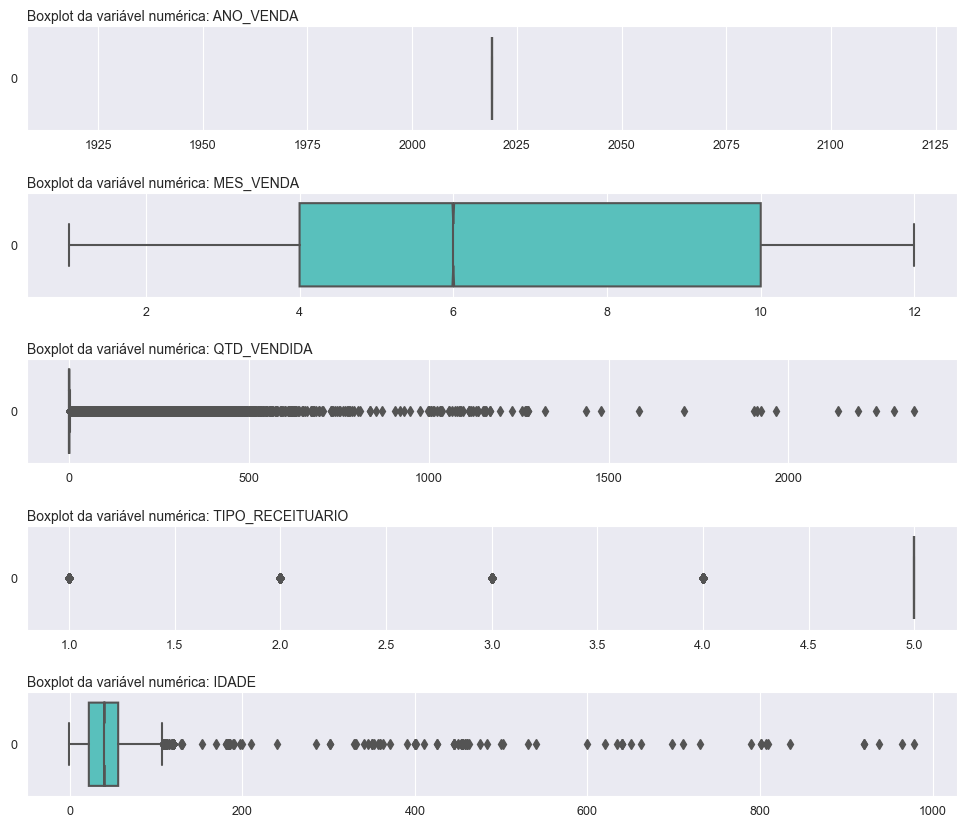

In [36]:
# Função para gerar gráficos boxplot para variáveis numéricas do DataFrame.

def grupo_graf_boxplot(dataframe):
    '''
    Plota vários boxplots de acordo com o número de colunas.

    :param dataframe: DataFrame
        DataFrame a ser analisado.
    '''
    # Seleciona apenas variáveis numéricas
    colunas_numericas = dataframe.select_dtypes(include=['number']).columns

    # Calcula a quantidade de subplots necessário
    qtde_subplots = len(colunas_numericas)

    # Cria subplots dinamicamente
    fig, axs = plt.subplots(qtde_subplots, 1, figsize=(
        12, 2 * qtde_subplots), gridspec_kw={'hspace': 0.6})

    # Loop sobre as variáveis numéricas e plota o boxplot
    for i, col in enumerate(colunas_numericas):
        sns.boxplot(data=dataframe[col], ax=axs[i],
                    notch=True, orient='h', color='mediumturquoise')
        # Configura o título e remove os rótulos dos eixos
        axs[i].set_title(
            f'Boxplot da variável numérica: {col}', loc='left', fontsize=10, pad=4)
        axs[i].set(xlabel='', ylabel='')
        # Ajusta o tamanho dos rótulos
        axs[i].tick_params(labelsize=9)
        # Exibe rótulos sem formatação especial
        axs[i].ticklabel_format(style='plain', axis='x')

    # Ajusta o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()


# Chamada da função para o DataFrame 'df'
grupo_graf_boxplot(df)

A análise de dados das variáveis numéricas por meio de gráficos *boxplot* permite a observação da distribuição dos dados e a identificação de *outliers* (valores muito discrepantes da maioria dos dados). Abaixo, destacam-se as análises das variáveis mencionadas:

**ANO_VENDA**:
   - A variável **ANO_VENDA** não apresenta variação, pois seu único valor é **2019**.
   - Não há *outliers* nesta variável, já que todos os valores são iguais.

**MES_VENDA**:
   - Não há *outliers* na variável **MES_VENDA**.
   - A distribuição dos dados parece ser uniforme, indicando que as vendas estão bem distribuídas ao longo dos meses.

**QTD_VENDIDA**:
   - A presença de *outliers* na coluna **QTD_VENDIDA** requer uma análise mais detalhada.
   - É necessário determinar se esses valores são válidos ou se representam erros. Além disso, é crucial avaliar o impacto desses *outliers* na análise geral.

**TIPO_RECEITUARIO**:
   - A variável **TIPO_RECEITUARIO** possui valores entre **1** e **5**.
   - Há *outliers* indicados no gráfico, porém os dados estão dentro do intervalo esperado.

**IDADE**:
   - De maneira semelhante a "quantidade vendida", *outliers* na coluna **IDADE** também exigem uma análise mais aprofundada.
   - A validade desses valores precisa ser verificada, e seu impacto na análise geral deve ser avaliado.

Em resumo, é essencial investigar os *outliers* nas colunas **QTD_VENDIDA** e **IDADE** para compreender sua origem e entender como podem influenciar os resultados da análise.

### 5.2. Análise dos outliers identificados

In [37]:
# Geração dos limites inferior e superior das variáveis que apresentaram outliers

# Seleciona colunas numéricas
cols_numericas = df.select_dtypes(include=['number']).columns

for col in cols_numericas:

    # Calcula quartis e intervalo interquartil
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IIQ = Q3 - Q1

    # Define limites inferior e superior
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ

    # Calcula a porcentagem de dados fora dos limites
    total_limite = (len(df[df[col] > limite_superior]) +
                    len(df[df[col] < limite_inferior]))
    
    # Calcula a porcentagem de dados fora dos limites
    total_limite_perc = ((len(df[df[col] > limite_superior]) +
                    len(df[df[col] < limite_inferior])) / df.shape[0])

    # Exibe informações
    print(f'\n{col.upper()}')
    print(f'Intervalo interquartil: {IIQ}')
    print(f'Limite inferior: {limite_inferior}')
    print(f'Limite superior: {limite_superior}')
    print(f'Os outliers correspondem a {total_limite_perc:.2%} ({total_limite}) dos dados da variável.')


ANO_VENDA
Intervalo interquartil: 0.0
Limite inferior: 2019.0
Limite superior: 2019.0
Os outliers correspondem a 0.00% (0) dos dados da variável.

MES_VENDA
Intervalo interquartil: 6.0
Limite inferior: -5.0
Limite superior: 19.0
Os outliers correspondem a 0.00% (0) dos dados da variável.

QTD_VENDIDA
Intervalo interquartil: 1.0
Limite inferior: -0.5
Limite superior: 3.5
Os outliers correspondem a 15.59% (115014) dos dados da variável.

TIPO_RECEITUARIO
Intervalo interquartil: 0.0
Limite inferior: 5.0
Limite superior: 5.0
Os outliers correspondem a 14.60% (107723) dos dados da variável.

IDADE
Intervalo interquartil: 34.0
Limite inferior: -29.0
Limite superior: 107.0
Os outliers correspondem a 0.66% (4882) dos dados da variável.


In [38]:
# Exibindo os valores dos outliers com base nas informações da análise anterior

fn.valores_outliers(df, 'IDADE', limite_superior, '>')


IDADE: [108. 109. 110. 111. 113. 115. 118. 119. 120. 129. 130. 153. 169. 181.
 182. 183. 184. 185. 186. 189. 190. 197. 200. 210. 240. 285. 301. 302.
 329. 330. 332. 341. 346. 350. 353. 357. 360. 363. 371. 391. 400. 401.
 410. 425. 445. 450. 453. 454. 455. 458. 460. 463. 475. 483. 500. 502.
 531. 540. 600. 620. 634. 640. 650. 662. 698. 711. 730. 789. 801. 807.
 809. 835. 920. 938. 964. 979.]


In [39]:
# Exibindo os valores dos outliers com base nas informações da análise anterior

fn.valores_outliers(df, 'QTD_VENDIDA', limite_superior, '>')


QTD_VENDIDA: [ 108  109  110  111  112  113  114  115  116  117  118  119  120  121
  122  123  124  125  126  127  128  129  130  131  132  133  134  135
  136  137  138  139  140  141  142  143  144  145  146  147  148  149
  150  151  152  153  154  155  156  157  158  159  160  161  162  163
  164  165  166  167  168  169  170  171  172  173  174  175  176  177
  178  179  180  181  182  183  184  185  186  187  188  189  190  191
  192  193  194  195  196  197  198  199  200  201  202  203  204  205
  206  207  208  209  210  211  212  213  214  215  216  217  218  219
  220  221  222  223  224  225  226  227  228  229  230  231  232  233
  234  235  236  237  238  239  240  241  242  243  244  245  246  247
  248  249  250  251  252  253  254  255  256  257  258  259  260  261
  262  263  264  265  266  267  268  269  270  271  272  273  274  275
  276  277  278  279  280  281  282  283  284  285  286  287  288  289
  290  291  292  293  294  295  296  297  298  299  300  301  3

Os outliers são valores atípicos que se distinguem significativamente dos demais dados em um conjunto. Eles podem originar-se de erros de medição, falhas na coleta de dados ou representar eventos raros e extremos.

**QTD_VENDIDA**: Foram identificados 15,59% de outliers nesta variável, que representa quantidades vendidas. No entanto, é importante notar que não há um limite conhecido para vendas, o que torna difícil afirmar se esses valores são realmente indicativos de erros.

**TIPO_RECEITUARIO**: Esta variável possui 5 valores distintos, conforme mencionado ao longo da análise. Apesar da indicação de 14,60% de outliers, não é necessário tomar nenhuma ação, uma vez que esse valor não é indicativo de anomalias. É importante considerar o contexto e a natureza da variável.

**IDADE**: Foram identificados 0,66% de outliers nesta variável, representando pessoas com idades superiores a 107 anos. Embora seja possível que algumas pessoas ultrapassem essa idade, a presença de casos com idades de até 979 anos sugere claramente erros de lançamento ou processamento desses dados. Neste caso, seram mantidos os registros até 120 anos, considerando limites plausíveis. Uma análise mais aprofundada poderia confirmar sobre a validade desses dados e se é necessário algum tratamento específico.

In [40]:
# Filtra os registros com idade <= 120, conforme proposto na análise dos outliers.

df = df[df['IDADE'] <= 120]

In [41]:
# Exibindo a quantidade de linhas e colunas do dataframe

print(f'\nVOLUMETRIA APÓS ANÁLISE DOS OUTLIERS DOS DADOS')
print(f'\nQuantidade de linhas (registros):  {df.shape[0]}')
print(f'\nQuantidade de colunas (variáveis): {df.shape[1]}')


VOLUMETRIA APÓS ANÁLISE DOS OUTLIERS DOS DADOS

Quantidade de linhas (registros):  737505

Quantidade de colunas (variáveis): 15


### 5.3. Distribuição dos dados em gráfico histograma

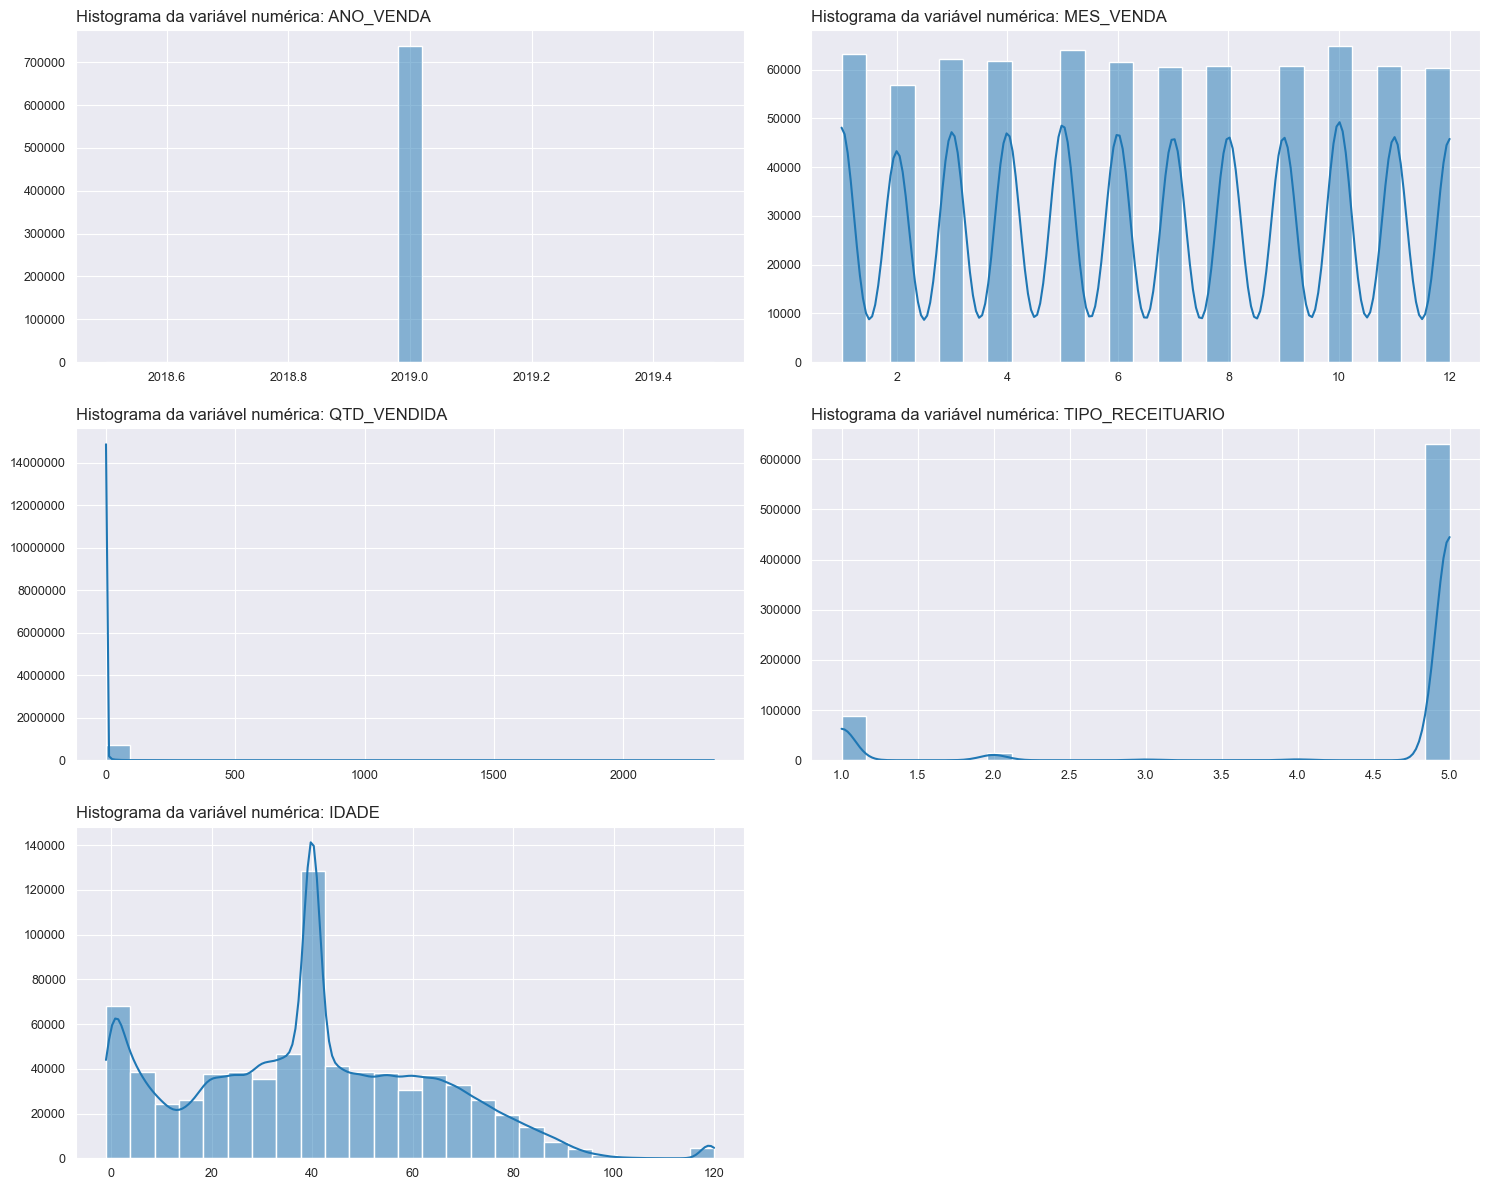

In [42]:
# Função para gerar gráficos histplot para variáveis numéricas do DataFrame.

def grupo_graf_histplot(dataframe):
    '''
    Função para gerar gráficos histplot para variáveis numéricas do DataFrame.

    :param dataframe: DataFrame
        DataFrame a ser analisado.
    '''
    # Seleciona apenas variáveis numéricas
    colunas_numericas = dataframe.select_dtypes(include=['number']).columns

    # Calcula a quantidade de subplots necessários
    qtde_subplots = len(colunas_numericas)

    # Define o número de colunas desejado (neste caso, 2)
    colunas_subplot = 2

    # Calcula o número de linhas necessário
    qtde_linhas = -(-qtde_subplots // colunas_subplot)

    # Cria subplots dinamicamente
    fig, axs = plt.subplots(qtde_linhas, colunas_subplot, figsize=(15, 4 * qtde_linhas))

    # Flattening do array de subplots para facilitar o loop
    axs = axs.flatten()

    # Remove subplots não utilizados
    for i in range(qtde_subplots, qtde_linhas * colunas_subplot):
        fig.delaxes(axs[i])

    # Loop sobre as variáveis numéricas e plota o gráfico
    for i, coluna in enumerate(colunas_numericas):
        sns.histplot(data=dataframe, x=coluna, ax=axs[i], bins=25, kde=True)

        # Configura o título e remove os rótulos dos eixos
        axs[i].set_title(f'Histograma da variável numérica: {coluna}', loc='left')
        axs[i].set(xlabel='', ylabel='')

        # Ajusta o tamanho dos rótulos
        axs[i].tick_params(labelsize=9)

        # Exibe rótulos sem formatação especial
        axs[i].ticklabel_format(style='plain', axis='y')

    # Ajusta o layout para evitar sobreposição
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)
    plt.show()

# Chamada da função para o DataFrame 'df'
grupo_graf_histplot(df)


A análise de variáveis numéricas, através de gráficos de **histograma**, proporciona uma visão detalhada da distribuição dos dados e a identificação de padrões. Vamos detalhar cada uma das variáveis mencionadas:

**ANO_VENDA**:
   - A variável **ANO_VENDA** permanece inalterada, já que seu valor único é **2019**.
   - Não há variação nessa variável, visto que todos os dados pertencem ao mesmo ano.

**MES_VENDA**:
   - Os meses apresentam variações, sem indicar sazonalidade significativa.
   - Não há discrepâncias acentuadas entre os meses.

**QTD_VENDIDA**:
   - A presença de *outliers* provoca distorções no gráfico, dada a baixa frequência desses valores atípicos.
   - Conforme mencionado na análise dos *outliers*, não é possível identificar um limite para a variável, e valores de baixa frequência podem indicar algum tipo de erro.

**TIPO_RECEITUARIO**:
   - Os valores **5** e **1** são os que apresentam maior frequência na variável **TIPO_RECEITUARIO**.
   - Essa informação é relevante para compreender os padrões de prescrição.

**IDADE**:
   - *Outliers* acima de 120 anos na coluna **IDADE** foram removidos, minimizando o impacto na análise.
   - Observa-se uma grande frequência em idades até aproximadamente 4 anos e uma significativa alta frequência em torno dos 40 anos. Esses insights podem indicar padrões interessantes na distribuição das idades.

### 5.4. Distribuição dos dados em gráfico de barras

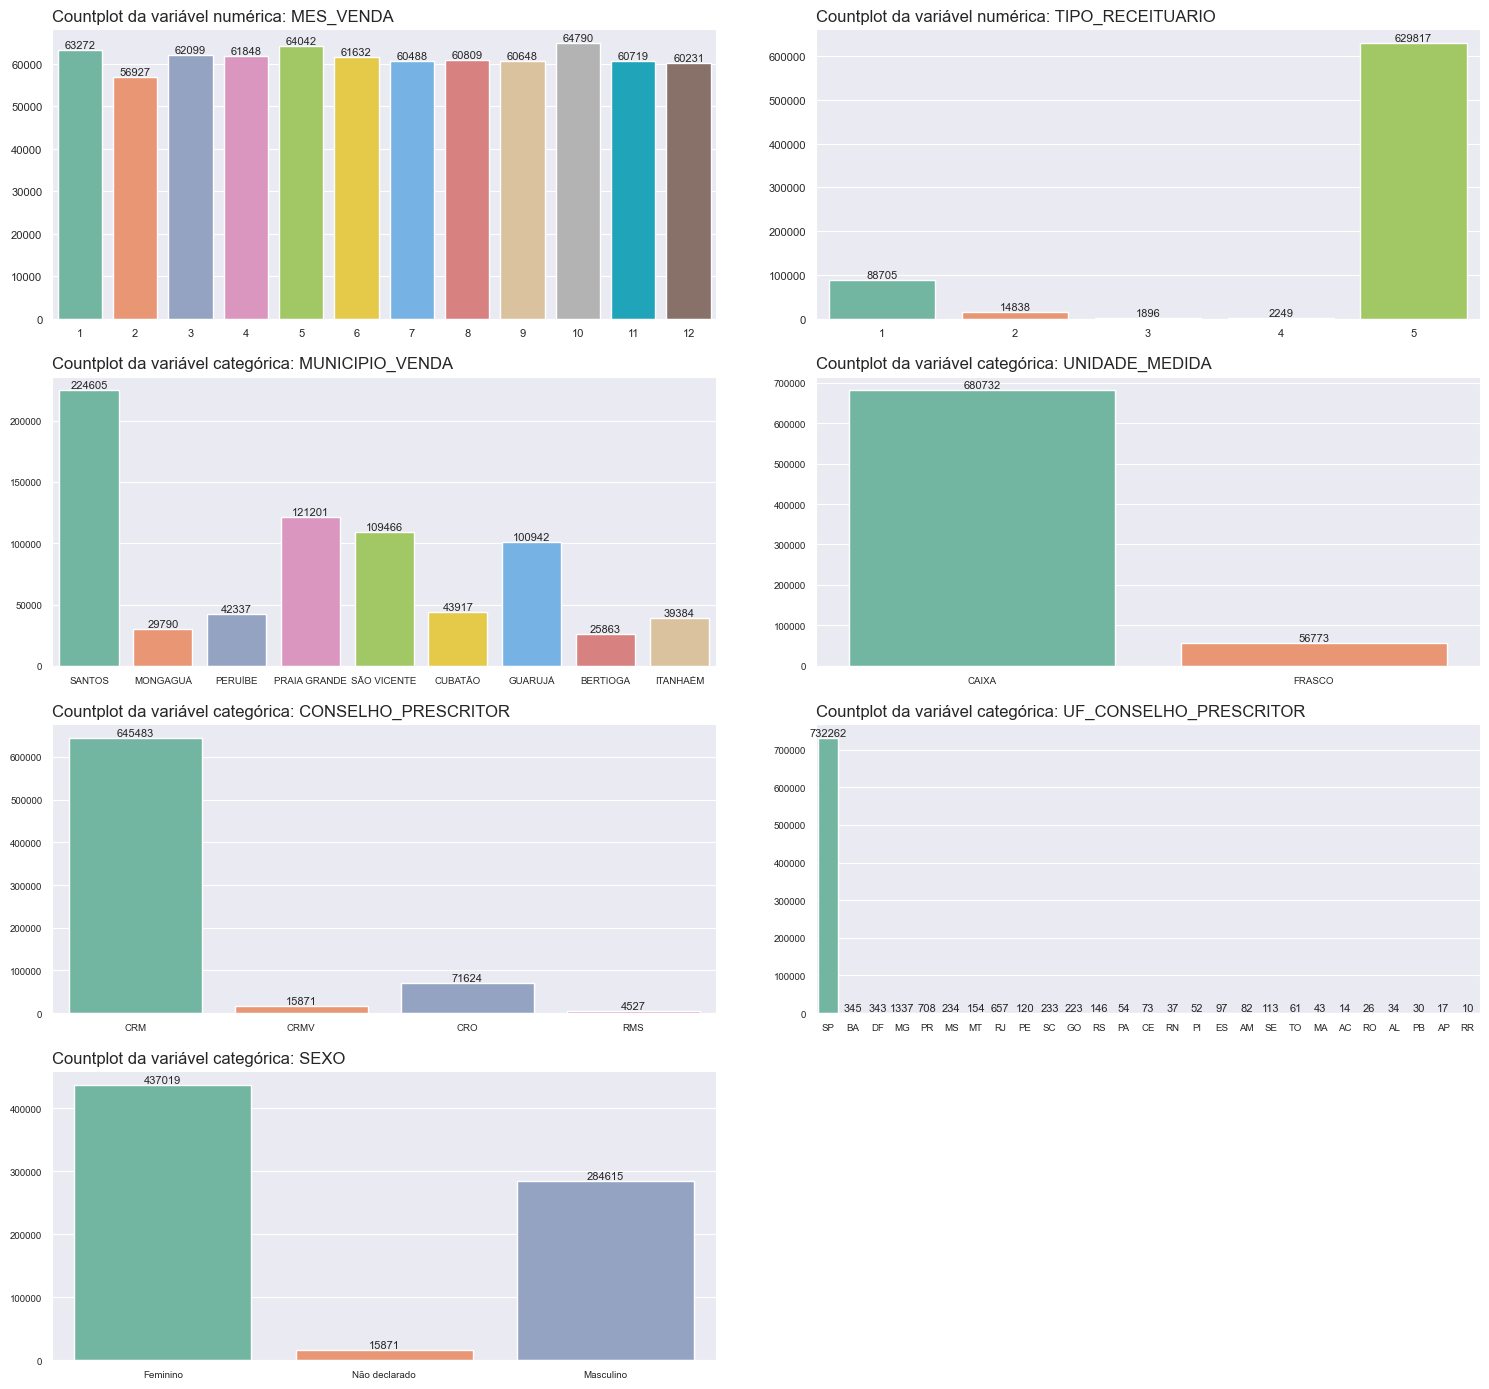

In [43]:
# Função para gerar gráficos de barras (countplot e barplot) para variáveis numéricas e categóricas do DataFrame.

def grupo_graf_countplot(dataframe, cardinalidade_limite=50, ncols=2):
    '''
    Função para gerar gráficos de barras (countplot e barplot) para variáveis numéricas e categóricas do DataFrame.

    :param dataframe: DataFrame
        DataFrame a ser analisado.
    :param cardinalidade_limite: int, optional
        Limite de cardinalidade para considerar uma variável como categórica.
    :param ncols: int, optional
        Número de colunas para dispor os subplots.        
    '''
    # Separar variáveis numéricas e categóricas
    colunas_numericas = dataframe.select_dtypes(include=['number']).columns
    colunas_categoricas = dataframe.select_dtypes(
        exclude=['number', 'datetime']).columns

    # Filtrar apenas as variáveis categóricas com cardinalidade abaixo ou igual ao limite
    colunas_numericas_filtradas = [col for col in colunas_numericas if 1 < len(
        dataframe[col].unique()) <= cardinalidade_limite]
    colunas_categoricas_filtradas = [col for col in colunas_categoricas if 1 < len(
        dataframe[col].unique()) <= cardinalidade_limite]

    # Calcular a quantidade de subplots necessário
    qtde_subplots = len(colunas_numericas_filtradas) + \
        len(colunas_categoricas_filtradas)

    # Calcular o número de linhas
    nrows = (qtde_subplots + ncols - 1) // ncols

    # Criar subplots dinamicamente com layout ajustado
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 2 * qtde_subplots))

    # Achatar a lista de subplots se for bidimensional
    axs = axs.flatten() if nrows > 1 else [axs]

    # Remover subplots não utilizados
    for i in range(qtde_subplots, nrows * ncols):
        fig.delaxes(axs[i])

    # Loop sobre as variáveis numéricas filtradas e plotar o gráfico
    for i, col in enumerate(colunas_numericas_filtradas):
        # Plotar gráficos apenas para variáveis numéricas
        axs[i] = sns.countplot(data=dataframe, x=col,
                               ax=axs[i], palette=palette)
        axs[i].set_title(f'Countplot da variável numérica: {col}', loc='left')
        axs[i].set(xlabel='', ylabel='')
        axs[i].tick_params(labelsize=8)
        axs[i].ticklabel_format(style='plain', axis='y')

        # Adicionar rótulos (valores) nas barras
        for container in axs[i].containers:
            axs[i].bar_label(container, size=8)

    # Loop sobre as variáveis categóricas filtradas e plotar o gráfico
    for i, col in enumerate(colunas_categoricas_filtradas):
        axs[len(colunas_numericas_filtradas) + i] = sns.countplot(data=dataframe, x=col,
                                                                  ax=axs[len(colunas_numericas_filtradas) + i], palette=palette)
        axs[len(colunas_numericas_filtradas) +
            i].set_title(f'Countplot da variável categórica: {col}', loc='left')
        axs[len(colunas_numericas_filtradas) + i].set(xlabel='', ylabel='')
        axs[len(colunas_numericas_filtradas) + i].tick_params(labelsize=7)

        # Adicionar rótulos (valores) nas barras
        for container in axs[len(colunas_numericas_filtradas) + i].containers:
            axs[len(colunas_numericas_filtradas) +
                i].bar_label(container, size=8)

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.15, hspace=0.2)
    plt.show()


# Chamada da função para o DataFrame 'df'
grupo_graf_countplot(df)

## 6. Análise exploratória dos dados

### 6.1. Construção de perfil de pacientes

* #### Qual é a faixa etária dos pacientes que compram medicamentos controlados?

In [44]:
# Agrupar idades numéricas em faixas etárias

# Não declarado - medicação receitada por um veterinário
# 00_00 - até 11 meses
# 01_05 - de 01 a 05 anos
# 06_12 - de 06 a 12 anos
# 13_17 - de 13 a 17 anos
# 18_24 - de 18 a 24 anos
# 25_44 - de 25 a 44 anos
# 45_64 - de 45 a 64 anos
# 65_More - maior ou igual a 65 anos

# Definindo os pontos de corte para cada faixa etária
faixa = [-1, 0, 1, 6, 13, 18, 25, 45, 65, df['IDADE'].max()]

# Definindo os rótulos para cada faixa etária
rotulos = ['Não declarado',
           '00_00',
           '01_05',
           '06_12',
           '13_17',
           '18_24',
           '25_44',
           '45_64',
           '65_Mais']

# Criando uma nova coluna 'FAIXA_ETARIA' no DataFrame
df['FAIXA_ETARIA'] = pd.cut(df['IDADE'], bins=faixa,
                            labels=rotulos, right=False)

# Criando uma cópia do DataFrame
df = pd.DataFrame(df)

# Exibindo as primeiras linhas do DataFrame após a inclusão da coluna 'FAIXA_ETARIA'
df.head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,DATA_PROC,DATA_REF,FAIXA_ETARIA
0,2019,1,SP,SANTOS,AZITROMICINA DI-HIDRATADA,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,1,CAIXA,CRM,SP,5,Feminino,44.0,2024-02-14,2019-01-01,25_44
1,2019,1,SP,SANTOS,AZITROMICINA DI-HIDRATADA,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,4,CAIXA,CRM,SP,5,Feminino,45.0,2024-02-14,2019-01-01,45_64
2,2019,1,SP,SANTOS,AZITROMICINA DI-HIDRATADA,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,2,CAIXA,CRM,SP,5,Feminino,46.0,2024-02-14,2019-01-01,45_64
3,2019,1,SP,SANTOS,AZITROMICINA DI-HIDRATADA,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,2,CAIXA,CRM,SP,5,Feminino,47.0,2024-02-14,2019-01-01,45_64
4,2019,1,SP,SANTOS,AZITROMICINA DI-HIDRATADA,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,4,CAIXA,CRM,SP,5,Feminino,48.0,2024-02-14,2019-01-01,45_64


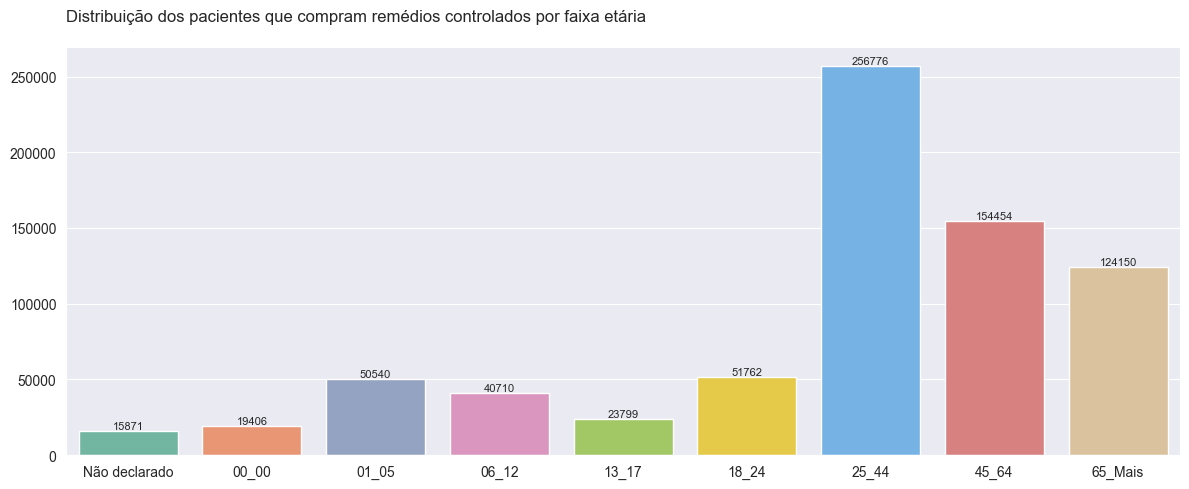

In [45]:
# Chamando a função para gerar um gráfico de barras (countplot)

fn.graf_countplot(df, 'FAIXA_ETARIA',
                  'Distribuição dos pacientes que compram remédios controlados por faixa etária', palette=palette)

    Recém-nascidos e lactentes: 0 a 1 ano
    Crianças pequenas: 1 a 5 anos
    Crianças em idade escolar: 6 a 12 anos
    Adolescentes: 13 a 17 anos
    Adultos jovens: 18 a 24 anos
    Adultos de meia-idade: 25 a 44 anos
    Adultos de idade avançada: 45 a 64 anos
    Idosos: 65 anos ou mais

* #### Há uma diferença significativa entre pacientes do sexo masculino e feminino?

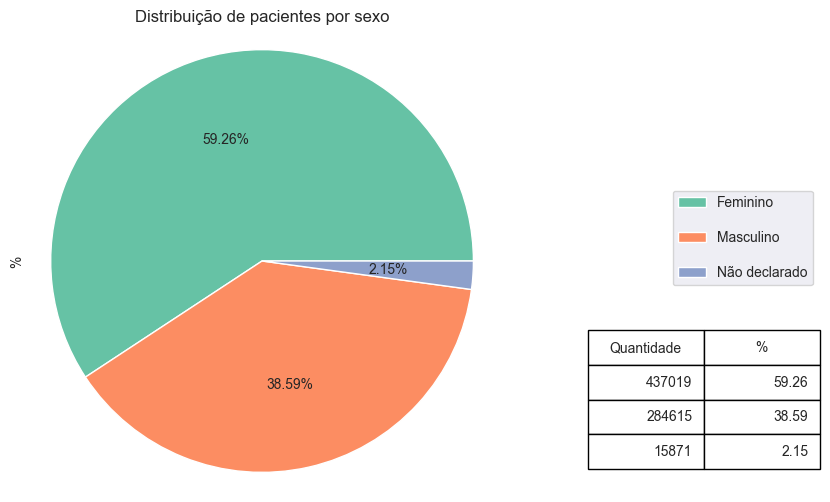

In [46]:
# Calcular as estatísticas no DataFrame para a variável 'SEXO'
df_sexo = df['SEXO'].value_counts()
df_sexo_percentual = df_sexo / df_sexo.sum() * 100
df_sexo = pd.DataFrame({'Qtde': df_sexo, '%': df_sexo_percentual})

# Criar gráfico de pizza
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
df_sexo['%'].plot.pie(labels=None, autopct='%0.2f%%', colors=colors, ax=ax)

# Adicionar legendas
legendas = ['Feminino', 'Masculino', 'Não declarado']
ax.legend(legendas, loc='right', labelspacing=1.5,
          bbox_to_anchor=(1.1, 0.1, 0.6, 0.9))


# Adicionar tabela
cell_text = df_sexo.apply(
    lambda x: [f'{int(x["Qtde"]):.0f}', f'{x["%"]:.2f}'], axis=1).tolist()
tabela = plt.table(cellText=cell_text, colLabels=['Quantidade', '%'],
                   loc='bottom right', bbox=(1.2, 0.05, 0.5, 0.3))
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)

# Ajustar layout
plt.axis('equal')
plt.title('Distribuição de pacientes por sexo')
plt.show()

* #### Existe uma diferença significativa na idade dos pacientes com base no sexo?

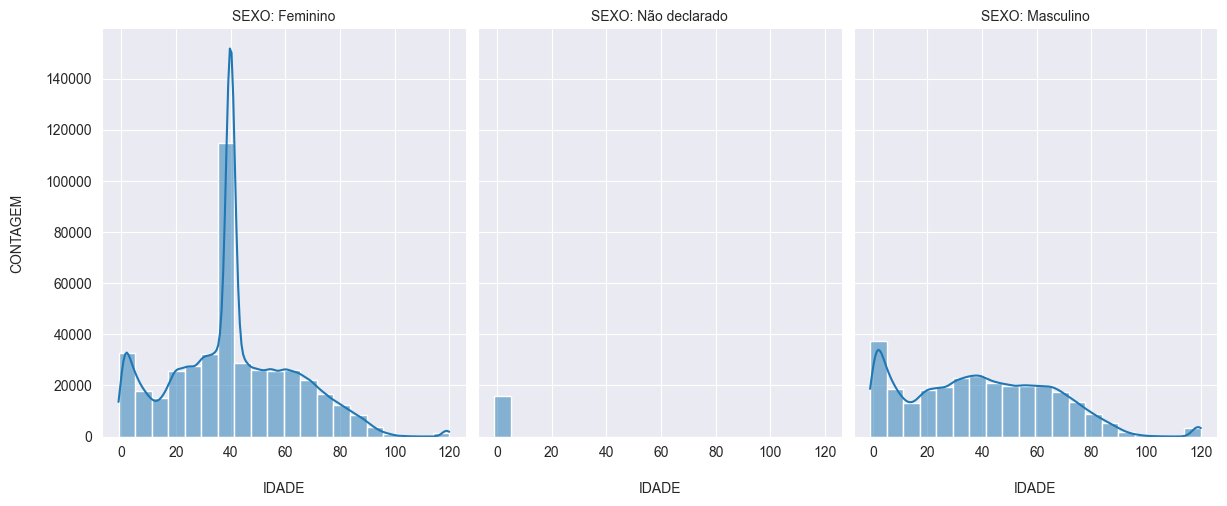

In [47]:
# Função para gerar gráfico displot

def graf_displot(dataframe, x, col, titulo):
    '''
    Função para gerar gráfico displot.

    :param dataframe: DataFrame
        DataFrame contendo os dados.
    :param x: str
        Nome da coluna a ser plotada no eixo x.
    :param col: Series
        Coluna usada para criar subplots.
    :param titulo: str
        Complemento ao título das colunas.
    '''
    # Plotar o gráfico displot
    plot = sns.displot(data=dataframe, x=x, col=col,
                       kde=True, bins=20)

    # Ajusta o tamanho dos rótulos
    plot.tick_params(labelsize=10)
    # Define rótulos dos eixos x e y
    plot.set_axis_labels(f'\n{x}', 'CONTAGEM\n', size=10)
    # Define os títulos dos subplots
    plot.set_titles(f'{titulo}'': {col_name}', size=10)
    # Define o tamanho da figura
    plot.figure.set_size_inches(12, 5)
    plt.show()

# Chamada da função para o DataFrame 'df'
graf_displot(df.loc[df['IDADE'] <= 120], 'IDADE', df['SEXO'], 'SEXO')

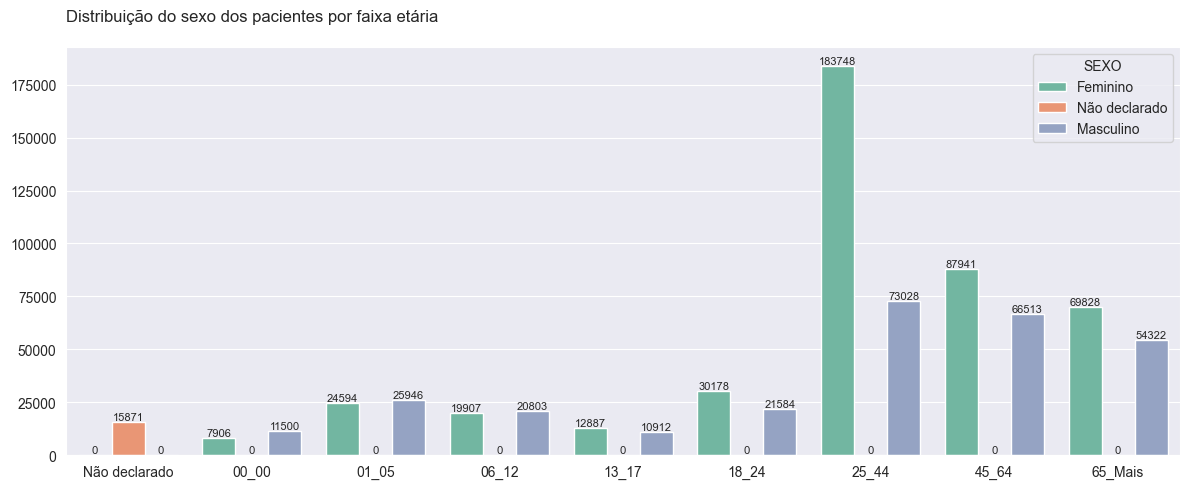

In [48]:
# Chamando a função para gerar um gráfico de barras (countplot)

fn.graf_countplot(df, 'FAIXA_ETARIA',
                  title='Distribuição do sexo dos pacientes por faixa etária', hue='SEXO', palette=palette)

* #### Quais são os tipos de receituário mais comuns entre os pacientes?

In [49]:
# Agrupar o DataFrame por 'TIPO_RECEITUARIO' e contar o número de ocorrências em cada grupo
df_tipo_receituario = df.groupby(['TIPO_RECEITUARIO']).size() \
    .sort_values(ascending=False).reset_index(name='Quantidade')

# Criar um novo DataFrame para armazenar os resultados
df_tipo_receituario = pd.DataFrame(df_tipo_receituario)

# Calcular a porcentagem de cada tipo de receituário em relação ao total
df_tipo_receituario['%'] = round(
    df_tipo_receituario['Quantidade'] / df_tipo_receituario['Quantidade'].sum() * 100, 2)

# Exibir o DataFrame resultante
df_tipo_receituario

,TIPO_RECEITUARIO,Quantidade,%
0,5,629817,85.40
1,1,88705,12.03
2,2,14838,2.01
3,4,2249,0.30
4,3,1896,0.26


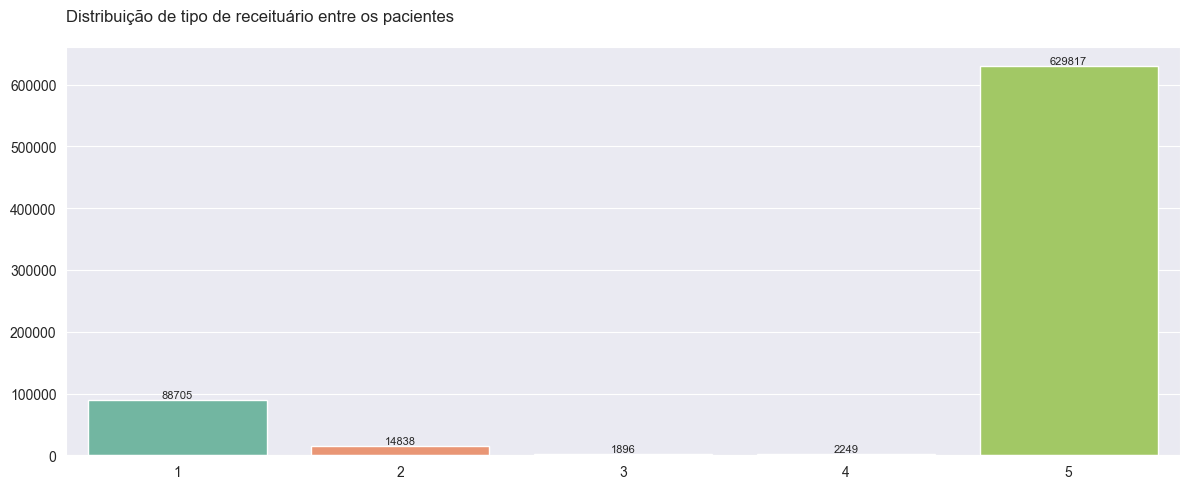

In [50]:
# Chamando a função para gerar um gráfico de barras (barplot)

fn.graf_barplot(df_tipo_receituario, 'TIPO_RECEITUARIO', 'Quantidade',
                'Distribuição de tipo de receituário entre os pacientes', palette=palette)

* #### Qual a distribuição entre os tipo de receituário por sexo dos pacientes?

In [51]:
# Agrupar o DataFrame por 'TIPO_RECEITUARIO' e 'SEXO', contar o número de registros 
# em cada grupo e ordenar os resultados
df_tipo_receituario_sexo = df.groupby(['TIPO_RECEITUARIO', 'SEXO']).size() \
    .sort_values(ascending=False)

# Criar um novo DataFrame para armazenar os resultados e renomear a coluna resultante para 'Quantidade'
df_tipo_receituario_sexo = pd.DataFrame(
    df_tipo_receituario_sexo).rename(columns={0: 'Quantidade'})

# Calcular a porcentagem de registros para cada tipo de receituário e sexo em relação ao total
df_tipo_receituario_sexo['%'] = round(
    df_tipo_receituario_sexo['Quantidade'] / df_tipo_receituario_sexo['Quantidade'].sum() * 100, 2)

# Resetar o índice para transformar os resultados em um DataFrame
df_tipo_receituario_sexo.reset_index(inplace=True)

# Exibir o DataFrame resultante
df_tipo_receituario_sexo

,TIPO_RECEITUARIO,SEXO,Quantidade,%
0,5,Feminino,343753,46.61
1,5,Masculino,275228,37.32
2,1,Feminino,75789,10.28
3,2,Feminino,13575,1.84
4,5,Não declarado,10836,1.47
5,1,Masculino,8151,1.11
6,1,Não declarado,4765,0.65
7,4,Feminino,2190,0.30
8,3,Feminino,1712,0.23
9,2,Masculino,1091,0.15


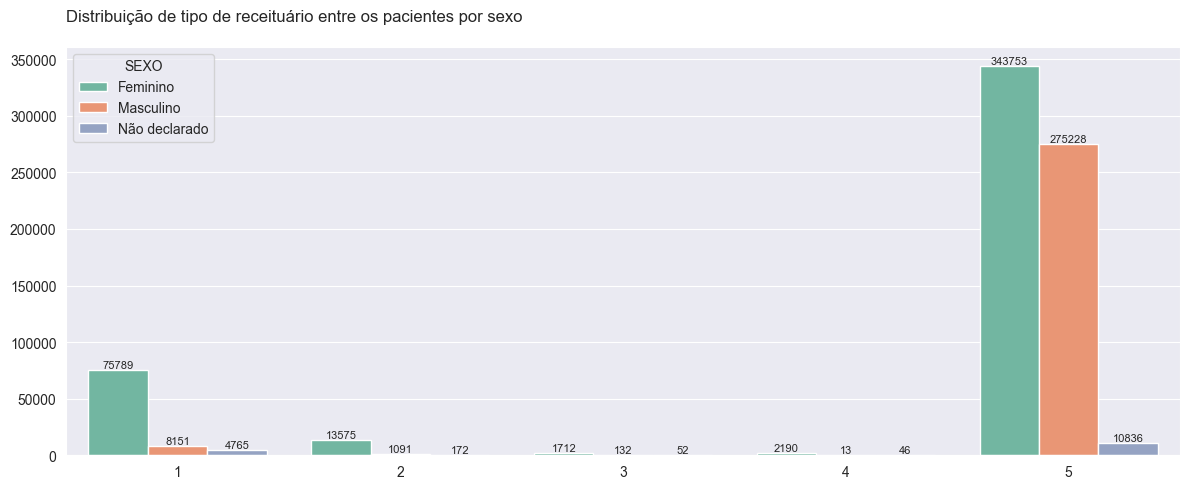

In [52]:
# Resetar o índice do DataFrame
df_tipo_receituario_sexo.reset_index(inplace=True)

# Chamando a função para gerar um gráfico de barras (barplot)
fn.graf_barplot(df_tipo_receituario_sexo, 'TIPO_RECEITUARIO', 'Quantidade',
                'Distribuição de tipo de receituário entre os pacientes por sexo', df_tipo_receituario_sexo['SEXO'], palette=palette)

* #### Qual a distribuição entre os tipo de receituário por faixa etária dos pacientes?

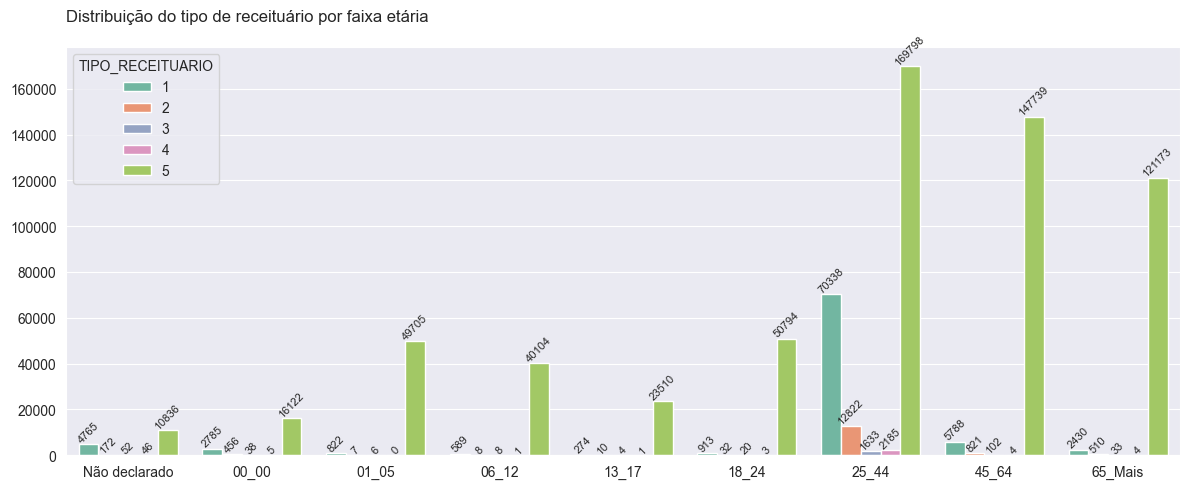

In [53]:
# Chamando a função para gerar um gráfico de barras (countplot)

fn.graf_countplot(df, 'FAIXA_ETARIA', title='Distribuição do tipo de receituário por faixa etária',
                  hue='TIPO_RECEITUARIO', rotation=45, palette=palette)

### 6.2. Distribuição de pacientes por município

* #### Qual é a distribuição em cada município dos pacientes que compram medicamentos controlados?

In [54]:
# Contar a quantidade de registros por município e ordenar em ordem decrescente
df_municipio_venda = df['MUNICIPIO_VENDA'].value_counts(
    ascending=False).reset_index()

# Renomear as colunas para 'MUNICIPIO_VENDA', 'Quantidade'
df_municipio_venda.columns = ['MUNICIPIO_VENDA', 'Quantidade']

# Calcular a porcentagem de cada município em relação ao total
df_municipio_venda['%'] = round(
    df_municipio_venda['Quantidade'] / df_municipio_venda['Quantidade'].sum() * 100, 2)

# Exibir o DataFrame resultante
df_municipio_venda

,MUNICIPIO_VENDA,Quantidade,%
0,SANTOS,224605,30.45
1,PRAIA GRANDE,121201,16.43
2,SÃO VICENTE,109466,14.84
3,GUARUJÁ,100942,13.69
4,CUBATÃO,43917,5.95
5,PERUÍBE,42337,5.74
6,ITANHAÉM,39384,5.34
7,MONGAGUÁ,29790,4.04
8,BERTIOGA,25863,3.51


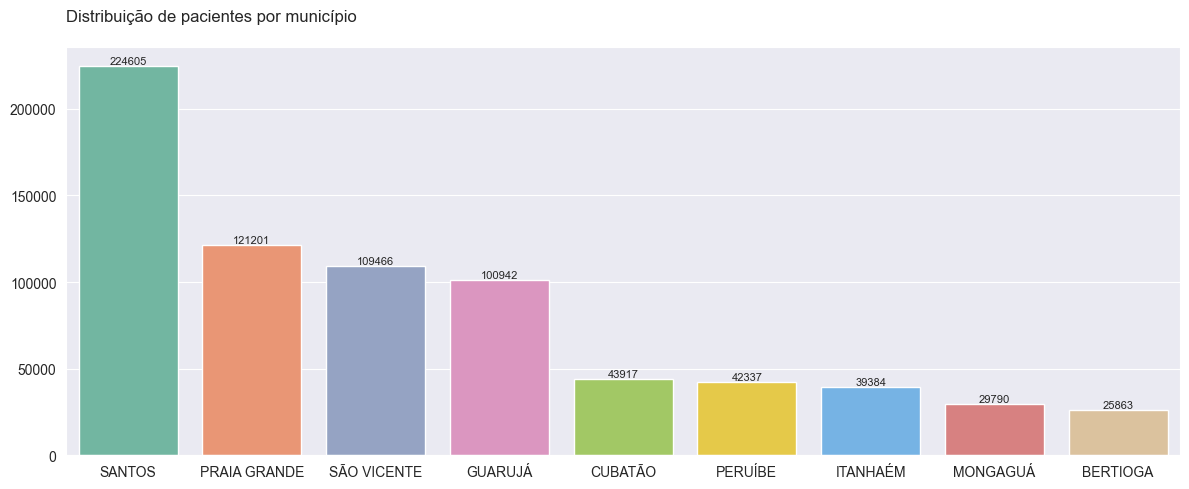

In [55]:
# Chamando a função para gerar um gráfico de barras (barplot)

fn.graf_barplot(df_municipio_venda, 'MUNICIPIO_VENDA', 'Quantidade',
                'Distribuição de pacientes por município', palette=palette)

* #### Qual é a idade média dos pacientes em cada município?

In [56]:
# Filtrar os registros onde a idade é diferente de -1
df_idade_valida = df[df['IDADE'] != -1]

# Agrupar o DataFrame pela coluna 'MUNICIPIO_VENDA' e calcular a média da coluna 'IDADE' para cada grupo
df_municipio_venda_idade = df.groupby('MUNICIPIO_VENDA')['IDADE'] \
    .mean().sort_values(ascending=False).reset_index()

# Renomear as colunas para 'MUNICIPIO_VENDA' e 'Idade média'
df_municipio_venda_idade.columns = ['MUNICIPIO_VENDA', 'Idade média']

# Exibir o DataFrame resultante
df_municipio_venda_idade

,MUNICIPIO_VENDA,Idade média
0,SANTOS,44.573268
1,SÃO VICENTE,38.980453
2,MONGAGUÁ,38.711704
3,ITANHAÉM,38.099395
4,PRAIA GRANDE,37.975721
5,PERUÍBE,37.808243
6,CUBATÃO,36.192448
7,GUARUJÁ,36.027317
8,BERTIOGA,33.489750


* #### Quais são as faixas etárias predominantes em cada município?

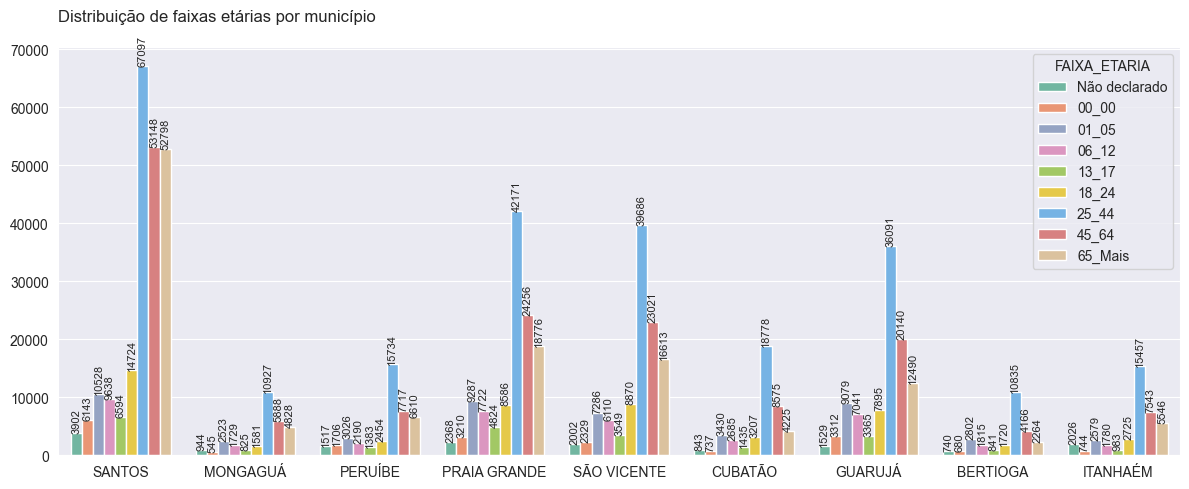

In [57]:
# Chamando a função para gerar um gráfico de barras (countplot)

fn.graf_countplot(df, 'MUNICIPIO_VENDA',
                  title='Distribuição de faixas etárias por município', hue='FAIXA_ETARIA', rotation=90, palette=palette)

* #### Qual é a distribuição de sexo e faixa etária dos pacientes em cada município?

In [58]:
# Obter a lista única de sexo na coluna 'SEXO'
sexos_unicos = df['SEXO'].unique()
sexos_unicos.sort()

# Agrupar o DataFrame por 'MUNICIPIO_VENDA', 'SEXO' e 'FAIXA_ETARIA' contando as ocorrências
df_municipio_sexo_idade = df.groupby(['MUNICIPIO_VENDA', 'SEXO', 'FAIXA_ETARIA']).size()
df_municipio_sexo_idade = pd.DataFrame(df_municipio_sexo_idade)

# Renomear colunas
df_municipio_sexo_idade.rename(columns={0: 'Quantidade'}, inplace=True)

# Iterar sobre os sexos
for sexo in sexos_unicos:
    try:
        # Selecionar dados específicos para o sexo atual
        df_sexo_atual = df_municipio_sexo_idade.xs(sexo, level='SEXO')
        df_sexo_atual = df_sexo_atual.unstack(0)
        
        # Exibir o sexo com destaque
        print('\n\n\033[1m' + sexo.upper() + '\033[0m')
        
        # Exibir o DataFrame
        display(df_sexo_atual)
        
    except KeyError:
        # Se o sexo não for encontrado, exibir mensagem
        print(f'\n\n\033[1m{ sexo.upper() } não encontrado.\033[0m')




FEMININO


Quantidade                                             
MUNICIPIO_VENDA   BERTIOGA CUBATÃO GUARUJÁ ITANHAÉM MONGAGUÁ PERUÍBE   
FAIXA_ETARIA                                                           
Não declarado            0       0       0        0        0       0  \
00_00                  328     333    1549      336      244     230   
01_05                 1396    1681    4494     1252     1185    1476   
06_12                  835    1287    3458      916      826    1057   
13_17                  509     761    1901      528      451     767   
18_24                 1082    1874    4653     1575      908    1518   
25_44                 8567   13987   25640    12289     8431   12556   
45_64                 2415    4714   11387     4448     3231    4618   
65_Mais               1207    2340    7227     3053     2585    3719   

                                                 
MUNICIPIO_VENDA PRAIA GRANDE SANTOS SÃO VICENTE  
FAIXA_ETARIA                                     
Não declarado              0      0           0  
00_00                   1471   2368        1047  
01_05                   4421   5166        3523  
06_12                   3716   4834        2978  
13_17                   2528   3508        1934  
18_24                   4802   8588        5178  
25_44                  28942  45709       27627  
45_64                  13266  30779       13083  
65_Mais                10474  29936        9287



MASCULINO


Quantidade                                             
MUNICIPIO_VENDA   BERTIOGA CUBATÃO GUARUJÁ ITANHAÉM MONGAGUÁ PERUÍBE   
FAIXA_ETARIA                                                           
Não declarado            0       0       0        0        0       0  \
00_00                  352     404    1763      408      301    1476   
01_05                 1406    1749    4585     1327     1338    1550   
06_12                  980    1398    3583      864      903    1133   
13_17                  332     674    1464      455      374     616   
18_24                  638    1333    3242     1150      673     936   
25_44                 2268    4791   10451     3168     2496    3178   
45_64                 1751    3861    8753     3095     2657    3099   
65_Mais               1057    1885    5263     2493     2243    2891   

                                                 
MUNICIPIO_VENDA PRAIA GRANDE SANTOS SÃO VICENTE  
FAIXA_ETARIA                                     
Não declarado              0      0           0  
00_00                   1739   3775        1282  
01_05                   4866   5362        3763  
06_12                   4006   4804        3132  
13_17                   2296   3086        1615  
18_24                   3784   6136        3692  
25_44                  13229  21388       12059  
45_64                  10990  22369        9938  
65_Mais                 8302  22862        7326



NÃO DECLARADO


Quantidade                                             
MUNICIPIO_VENDA   BERTIOGA CUBATÃO GUARUJÁ ITANHAÉM MONGAGUÁ PERUÍBE   
FAIXA_ETARIA                                                           
Não declarado          740     843    1529     2026      944    1517  \
00_00                    0       0       0        0        0       0   
01_05                    0       0       0        0        0       0   
06_12                    0       0       0        0        0       0   
13_17                    0       0       0        0        0       0   
18_24                    0       0       0        0        0       0   
25_44                    0       0       0        0        0       0   
45_64                    0       0       0        0        0       0   
65_Mais                  0       0       0        0        0       0   

                                                 
MUNICIPIO_VENDA PRAIA GRANDE SANTOS SÃO VICENTE  
FAIXA_ETARIA                                     
Não declarado           2368   3902        2002  
00_00                      0      0           0  
01_05                      0      0           0  
06_12                      0      0           0  
13_17                      0      0           0  
18_24                      0      0           0  
25_44                      0      0           0  
45_64                      0      0           0  
65_Mais                    0      0           0

### 6.3. Demanda de medicamentos por paciente

* #### Há uma diferença na demanda de medicamentos entre pacientes do sexo masculino e feminino?

In [59]:
# Agrupar o DataFrame por 'SEXO' e somar a quantidade vendida
df_sexo_qtd_vendida = df.groupby('SEXO')['QTD_VENDIDA'] \
    .sum().sort_values(ascending=False).reset_index()

# Renomear colunas para 'SEXO' e 'Quantidade vendida'
df_sexo_qtd_vendida.columns = ['SEXO', 'Quantidade vendida']

# Calcular a porcentagem em relação ao total
df_sexo_qtd_vendida['%'] = round(
    df_sexo_qtd_vendida['Quantidade vendida'] / df_sexo_qtd_vendida['Quantidade vendida'].sum() * 100, 2)

# Criar DataFrame final
df_sexo_qtd_vendida = pd.DataFrame(df_sexo_qtd_vendida)

# Exibir o DataFrame resultante
df_sexo_qtd_vendida

,SEXO,Quantidade vendida,%
0,Feminino,2328344,79.61
1,Masculino,514433,17.59
2,Não declarado,82066,2.81


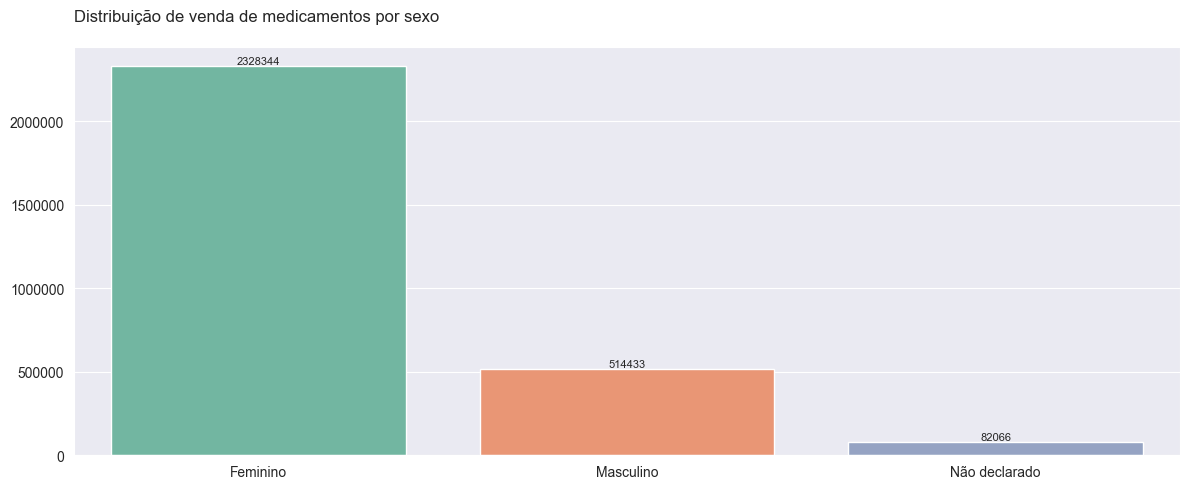

In [60]:
# Chamando a função para gerar um gráfico de barras (barplot)

fn.graf_barplot(df_sexo_qtd_vendida, 'SEXO', 'Quantidade vendida',
                'Distribuição de venda de medicamentos por sexo', palette=palette)

* #### Qual é a distribuição entre a faixa etária dos pacientes e a quantidade de medicamentos vendidos?

In [61]:
# Agrupar o DataFrame por 'FAIXA_ETARIA' e somar a quantidade vendida
df_faixa_qtd_vendida = df.groupby('FAIXA_ETARIA')['QTD_VENDIDA'] \
    .sum().sort_values(ascending=False).reset_index()

# Renomear colunas para 'FAIXA_ETARIA' e 'Quantidade vendida'
df_faixa_qtd_vendida.columns = ['FAIXA_ETARIA', 'Quantidade vendida']

# Calcular a porcentagem em relação ao total
df_faixa_qtd_vendida['%'] = round(
    df_faixa_qtd_vendida['Quantidade vendida'] / df_faixa_qtd_vendida['Quantidade vendida'].sum() * 100, 2)

# Criar DataFrame final
df_faixa_qtd_vendida = pd.DataFrame(df_faixa_qtd_vendida)

# Exibir o DataFrame resultante
df_faixa_qtd_vendida

,FAIXA_ETARIA,Quantidade vendida,%
0,25_44,2008736,68.68
1,45_64,270105,9.24
2,65_Mais,209782,7.17
3,01_05,112528,3.85
4,18_24,94471,3.23
5,Não declarado,82066,2.81
6,06_12,77977,2.67
7,13_17,39251,1.34
8,00_00,29866,1.02


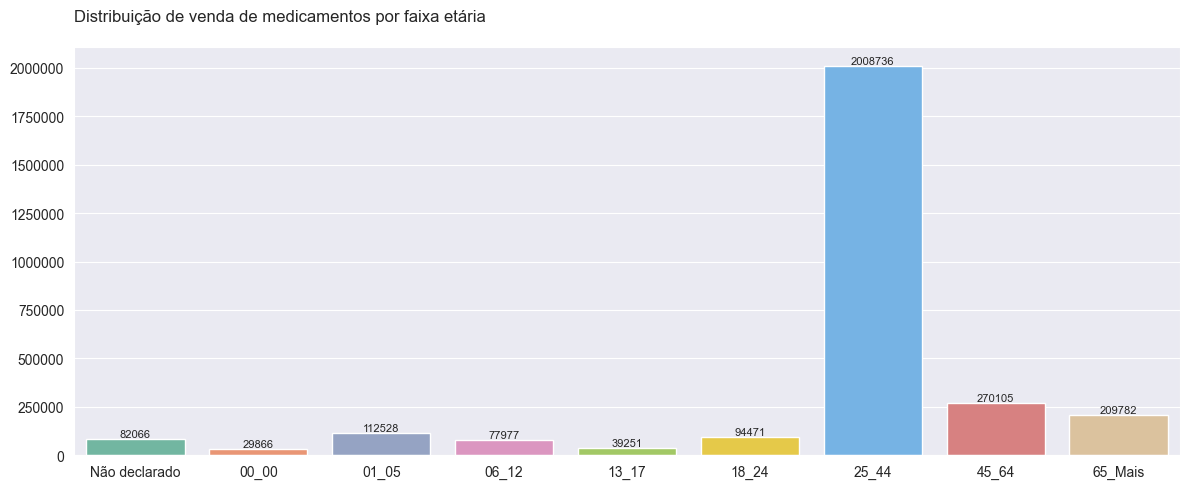

In [62]:
# Chamando a função para gerar um gráfico de barras (barplot)

fn.graf_barplot(df_faixa_qtd_vendida, 'FAIXA_ETARIA', 'Quantidade vendida',
                'Distribuição de venda de medicamentos por faixa etária', palette=palette)

* #### Existe alguma disparidade na demanda de medicamentos controlados com base no sexo e no tipo de receituário?

In [63]:
# Agrupar o DataFrame por 'SEXO' e 'TIPO_RECEITUARIO' e somar a quantidade vendida
df_sexo_tipo_qtd = df.groupby(['SEXO', 'TIPO_RECEITUARIO'])['QTD_VENDIDA'] \
    .sum().sort_values(ascending=False).reset_index()

# Renomear colunas para 'SEXO', 'TIPO_RECEITUARIO' e 'Quantidade vendida'
df_sexo_tipo_qtd.columns = ['SEXO', 'TIPO_RECEITUARIO', 'Quantidade vendida']

# Calcular a porcentagem em relação ao total
df_sexo_tipo_qtd['%'] = round(df_sexo_tipo_qtd['Quantidade vendida'] /
                              df_sexo_tipo_qtd['Quantidade vendida'].sum() * 100, 2)

# Criar DataFrame final
df_sexo_tipo_qtd = pd.DataFrame(df_sexo_tipo_qtd)

# Exibir o DataFrame resultante
df_sexo_tipo_qtd

,SEXO,TIPO_RECEITUARIO,Quantidade vendida,%
0,Feminino,1,1288392,44.05
1,Feminino,5,625257,21.38
2,Masculino,5,496702,16.98
3,Feminino,2,379209,12.97
4,Não declarado,5,47228,1.61
5,Não declarado,1,34098,1.17
6,Feminino,4,22899,0.78
7,Masculino,1,14458,0.49
8,Feminino,3,12587,0.43
9,Masculino,2,2972,0.10


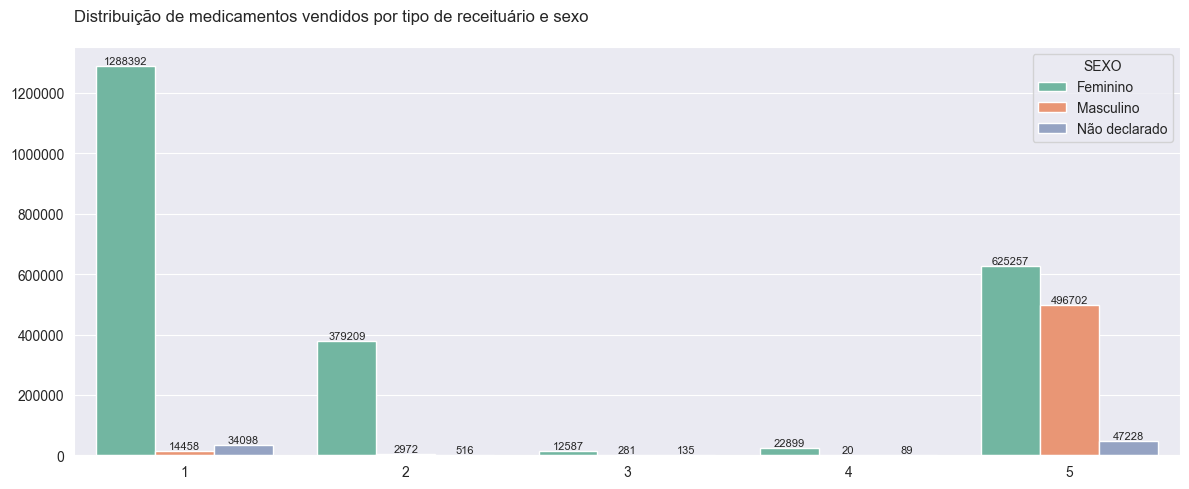

In [64]:
# Chamando a função para gerar um gráfico de barras (barplot)

fn.graf_barplot(df_sexo_tipo_qtd, 'TIPO_RECEITUARIO', 'Quantidade vendida',
                'Distribuição de medicamentos vendidos por tipo de receituário e sexo', df_sexo_tipo_qtd['SEXO'], palette=palette)

* #### Como foi a demanda de medicamentos controlados com base na faixa etária e no tipo de receituário?

In [65]:
# Agrupar o DataFrame por 'FAIXA_ETARIA' e 'TIPO_RECEITUARIO' e somar a quantidade vendida
df_faixa_tipo_qtd = df.groupby(['FAIXA_ETARIA', 'TIPO_RECEITUARIO'])['QTD_VENDIDA'] \
    .sum().sort_values(ascending=False).reset_index()

# Renomear colunas para 'FAIXA_ETARIA', 'TIPO_RECEITUARIO' e 'Quantidade vendida'
df_faixa_tipo_qtd.columns = ['FAIXA_ETARIA',
                             'TIPO_RECEITUARIO', 'Quantidade vendida']

# Calcular a porcentagem em relação ao total
df_faixa_tipo_qtd['%'] = round(df_faixa_tipo_qtd['Quantidade vendida'] /
                               df_faixa_tipo_qtd['Quantidade vendida'].sum() * 100, 2)

# Criar DataFrame final
df_faixa_tipo_qtd = pd.DataFrame(df_faixa_tipo_qtd)

# Exibir o DataFrame resultante
df_faixa_tipo_qtd

,FAIXA_ETARIA,TIPO_RECEITUARIO,Quantidade vendida,%
0,25_44,1,1278551,43.71
1,25_44,2,377568,12.91
2,25_44,5,317342,10.85
3,45_64,5,258441,8.84
4,65_Mais,5,204865,7.00
5,01_05,5,111390,3.81
6,18_24,5,93056,3.18
7,06_12,5,77037,2.63
8,Não declarado,5,47228,1.61
9,13_17,5,38836,1.33


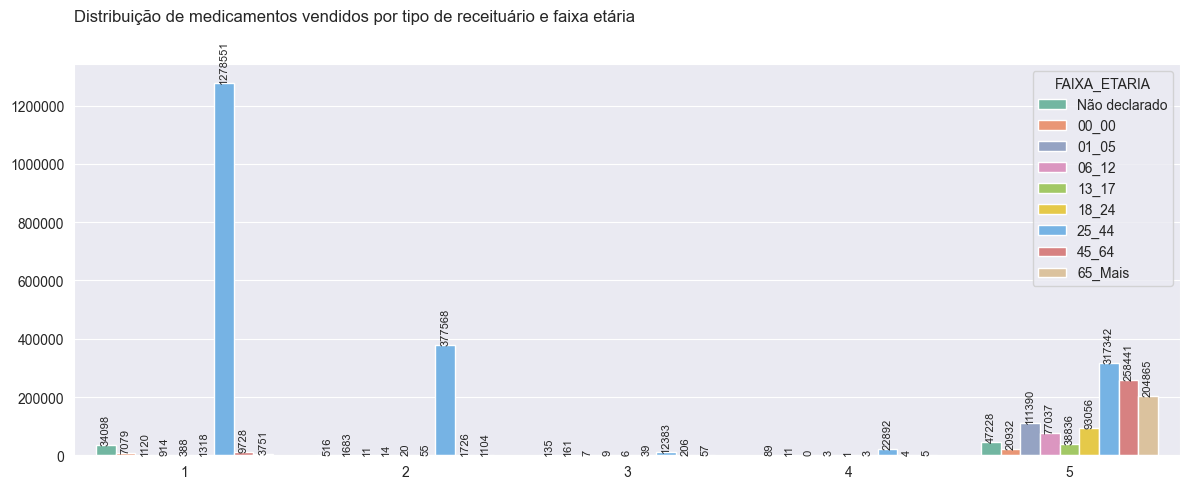

In [66]:
# Chamando a função para gerar um gráfico de barras (barplot)

fn.graf_barplot(df_faixa_tipo_qtd, 'TIPO_RECEITUARIO', 'Quantidade vendida',
                'Distribuição de medicamentos vendidos por tipo de receituário e faixa etária\n', df_faixa_tipo_qtd['FAIXA_ETARIA'], 90, palette)

* #### Como a demanda de medicamentos varia em diferentes faixas etárias ao longo do ano?

In [67]:
# Agrupar o DataFrame por 'FAIXA_ETARIA' e 'DATA_REF' e somar a quantidade vendida
df_faixa_etaria_data_qtd = df.groupby(['FAIXA_ETARIA', 'DATA_REF'])['QTD_VENDIDA'] \
    .sum().sort_values(ascending=False).reset_index()

# Renomear colunas para 'FAIXA_ETARIA', 'DATA_REF' e 'Quantidade vendida'
df_faixa_etaria_data_qtd.columns = [
    'FAIXA_ETARIA', 'DATA_REF', 'Quantidade vendida']

# Calcular a porcentagem em relação ao total da quantidade vendida
df_faixa_etaria_data_qtd['%'] = round(
    df_faixa_etaria_data_qtd['Quantidade vendida'] / df_faixa_etaria_data_qtd['Quantidade vendida'].sum() * 100, 2)

# Criar DataFrame final
df_faixa_etaria_data_qtd = pd.DataFrame(df_faixa_etaria_data_qtd)

# Exibir as 20 primeiras linhas do DataFrame resultante
df_faixa_etaria_data_qtd.head(20)

,FAIXA_ETARIA,DATA_REF,Quantidade vendida,%
0,25_44,2019-10-01,178407,6.10
1,25_44,2019-12-01,173995,5.95
2,25_44,2019-08-01,172503,5.90
3,25_44,2019-11-01,171618,5.87
4,25_44,2019-03-01,171418,5.86
5,25_44,2019-09-01,170479,5.83
6,25_44,2019-07-01,169996,5.81
7,25_44,2019-01-01,169040,5.78
8,25_44,2019-05-01,161132,5.51
9,25_44,2019-02-01,159646,5.46


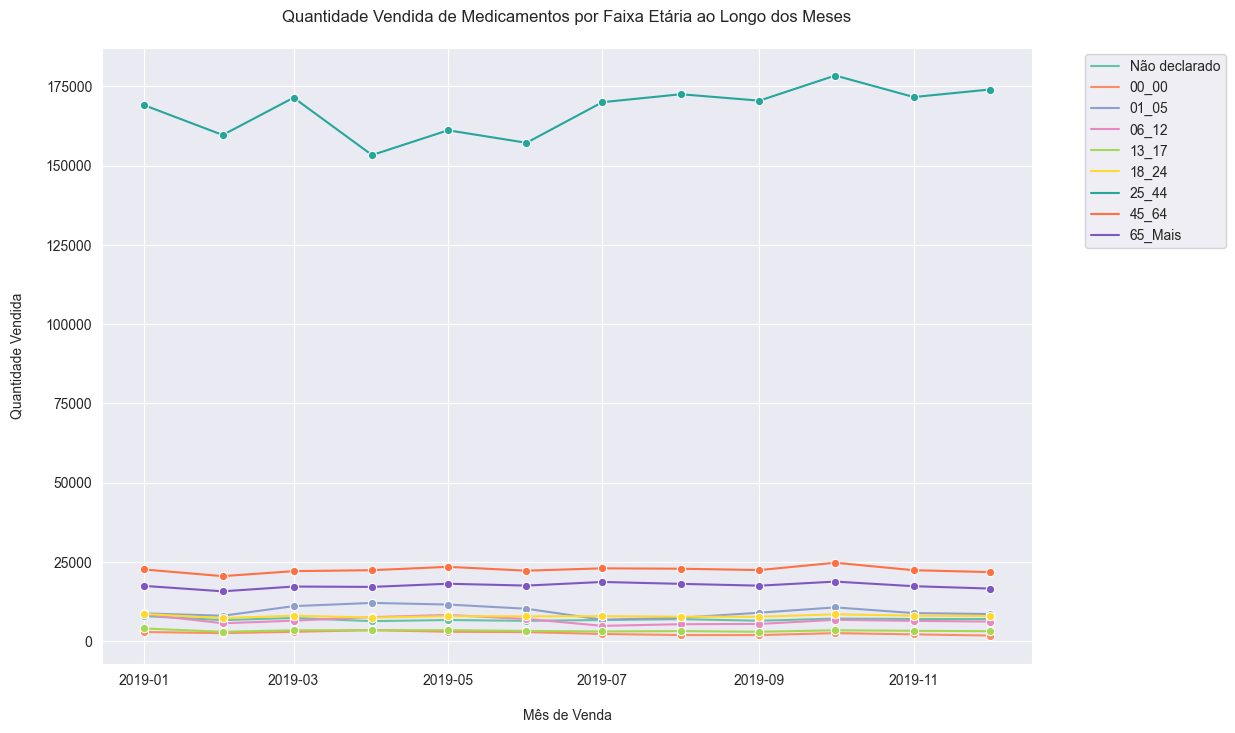

In [68]:
# Chamando a função para gerar um gráfico de linhas (lineplot)

fn.graf_lineplot(df_faixa_etaria_data_qtd, 'DATA_REF', 'Quantidade vendida', 'Quantidade Vendida de Medicamentos por Faixa Etária ao Longo dos Meses\n',
                 '\nMês de Venda', 'Quantidade Vendida\n', 'FAIXA_ETARIA')

* #### Como a demanda de medicamentos varia em diferentes sexos ao longo do ano?

In [69]:
# Agrupar o DataFrame por 'SEXO' e 'DATA_REF' e somar a quantidade vendida
df_sexo_data_qtd = df.groupby(['SEXO', 'DATA_REF'])['QTD_VENDIDA'] \
    .sum().sort_values(ascending=False).reset_index()

# Renomear colunas para 'SEXO', 'DATA_REF' e 'Quantidade vendida'
df_sexo_data_qtd.columns = ['SEXO', 'DATA_REF', 'Quantidade vendida']

# Calcular a porcentagem em relação ao total da quantidade vendida
df_sexo_data_qtd['%'] = round(df_sexo_data_qtd['Quantidade vendida'] /
                              df_sexo_data_qtd['Quantidade vendida'].sum() * 100, 2)

# Criar DataFrame final
df_sexo_data_qtd = pd.DataFrame(df_sexo_data_qtd)

# Exibir o DataFrame resultante
df_sexo_data_qtd

,SEXO,DATA_REF,Quantidade vendida,%
0,Feminino,2019-10-01,208006,7.11
1,Feminino,2019-12-01,198896,6.80
2,Feminino,2019-03-01,198526,6.79
3,Feminino,2019-11-01,198509,6.79
4,Feminino,2019-08-01,197832,6.76
5,Feminino,2019-01-01,196551,6.72
6,Feminino,2019-09-01,196098,6.70
7,Feminino,2019-07-01,195486,6.68
8,Feminino,2019-05-01,189092,6.47
9,Feminino,2019-02-01,184196,6.30


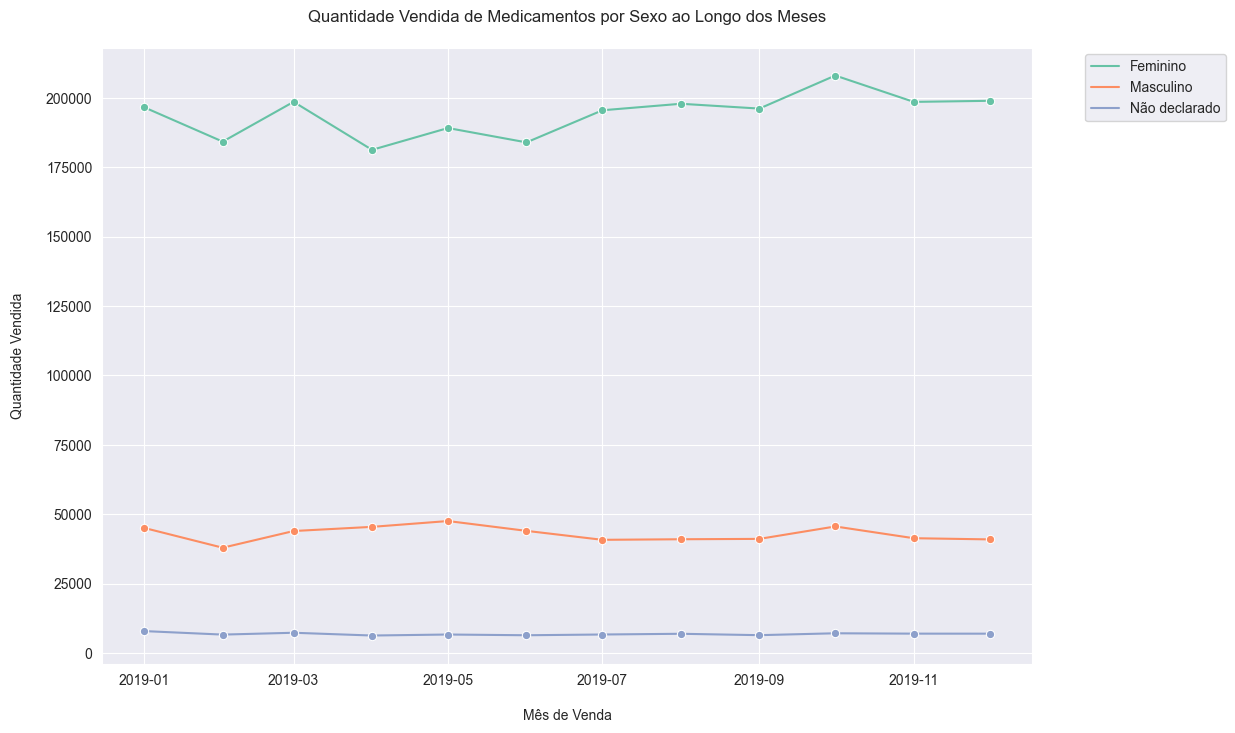

In [70]:
# Chamando a função para gerar um gráfico de linhas (lineplot)

fn.graf_lineplot(df_sexo_data_qtd, 'DATA_REF', 'Quantidade vendida', 'Quantidade Vendida de Medicamentos por Sexo ao Longo dos Meses\n',
                 '\nMês de Venda', 'Quantidade Vendida\n', 'SEXO')

### 6.4. Demanda de medicamentos por município

* #### Qual é a demanda total de medicamentos controlados em cada município?

In [71]:
# Agrupar o DataFrame por 'MUNICIPIO_VENDA' e somar a quantidade vendida
df_municipio_qtd_vendida = df.groupby(['MUNICIPIO_VENDA'])['QTD_VENDIDA'] \
    .sum().sort_values(ascending=False).reset_index()

# Renomear colunas para 'MUNICIPIO_VENDA' e 'Quantidade vendida'
df_municipio_qtd_vendida.columns = ['MUNICIPIO_VENDA', 'Quantidade vendida']

# Calcular a porcentagem em relação ao total da quantidade vendida
df_municipio_qtd_vendida['%'] = round(
    df_municipio_qtd_vendida['Quantidade vendida'] / df_municipio_qtd_vendida['Quantidade vendida'].sum() * 100, 2)

# Criar DataFrame final
df_municipio_qtd_vendida = pd.DataFrame(df_municipio_qtd_vendida)

# Exibir o DataFrame resultante
df_municipio_qtd_vendida

,MUNICIPIO_VENDA,Quantidade vendida,%
0,SANTOS,1202017,41.10
1,PRAIA GRANDE,476661,16.30
2,SÃO VICENTE,408718,13.97
3,GUARUJÁ,351501,12.02
4,CUBATÃO,125165,4.28
5,PERUÍBE,115728,3.96
6,ITANHAÉM,108915,3.72
7,MONGAGUÁ,76113,2.60
8,BERTIOGA,60025,2.05


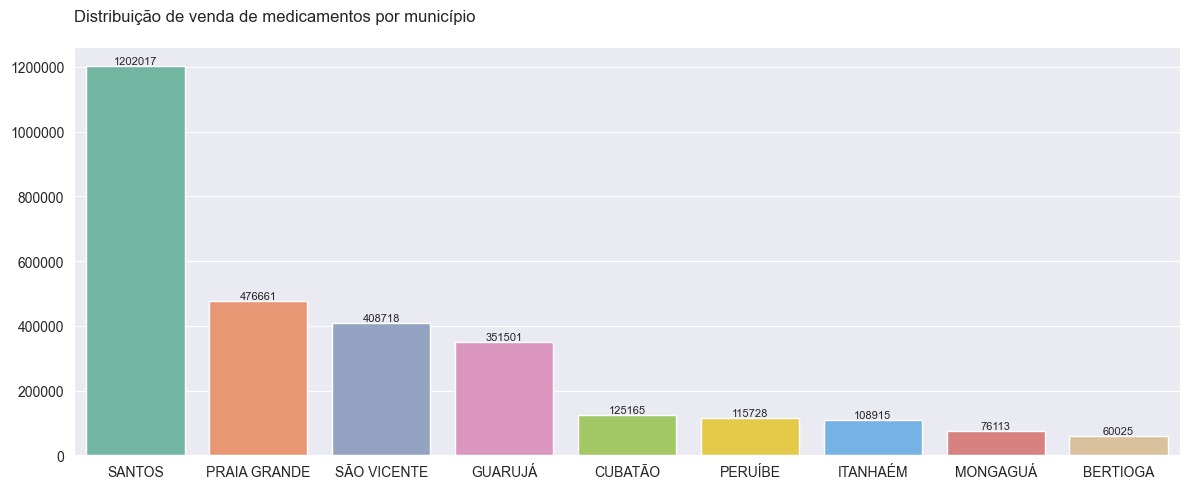

In [72]:
# Chamando a função para gerar um gráfico de barras (barplot)

fn.graf_barplot(df_municipio_qtd_vendida, 'MUNICIPIO_VENDA', 'Quantidade vendida',
                'Distribuição de venda de medicamentos por município', palette=palette)

* #### Existe uma sazonalidade na demanda de medicamentos em diferentes municípios?

In [73]:
# Agrupar o DataFrame por 'MUNICIPIO_VENDA' e 'DATA_REF' e somar a quantidade vendida
df_municipio_data_qtd = df.groupby(['MUNICIPIO_VENDA', 'DATA_REF'])['QTD_VENDIDA'] \
    .sum().sort_values(ascending=False).reset_index()

# Renomear colunas para 'MUNICIPIO_VENDA', 'DATA_REF' e 'Quantidade vendida'
df_municipio_data_qtd.columns = ['MUNICIPIO_VENDA', 'DATA_REF', 'Quantidade vendida']

# Calcular a porcentagem em relação ao total da quantidade vendida
df_municipio_data_qtd['%'] = round(
    df_municipio_data_qtd['Quantidade vendida'] / df_municipio_data_qtd['Quantidade vendida'].sum() * 100, 2)

# Criar DataFrame final
df_municipio_data_qtd = pd.DataFrame(df_municipio_data_qtd)

# Exibir as 20 primeiras linhas do DataFrame resultante
df_municipio_data_qtd.head(20)

,MUNICIPIO_VENDA,DATA_REF,Quantidade vendida,%
0,SANTOS,2019-10-01,110861,3.79
1,SANTOS,2019-11-01,105712,3.61
2,SANTOS,2019-03-01,100769,3.45
3,SANTOS,2019-01-01,100725,3.44
4,SANTOS,2019-04-01,100586,3.44
5,SANTOS,2019-09-01,99721,3.41
6,SANTOS,2019-07-01,99697,3.41
7,SANTOS,2019-05-01,98733,3.38
8,SANTOS,2019-12-01,98424,3.37
9,SANTOS,2019-08-01,97119,3.32


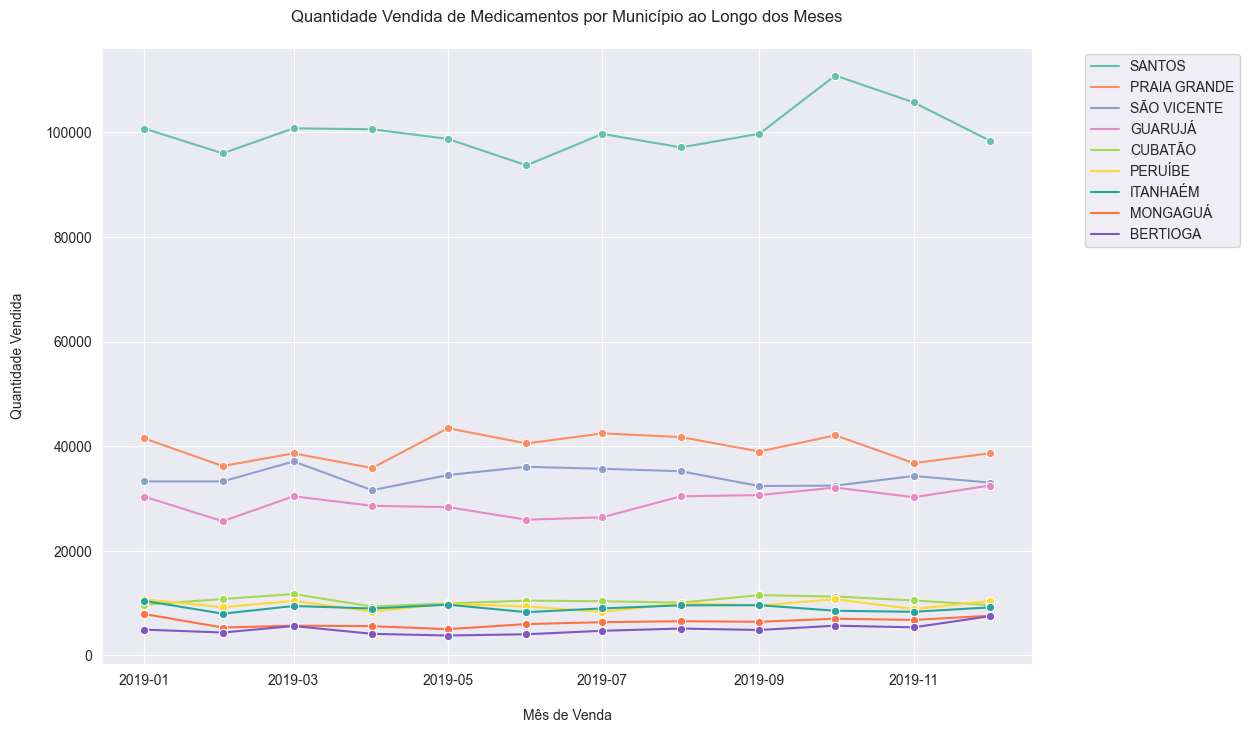

In [74]:
# Chamando a função para gerar um gráfico de linhas (lineplot)

fn.graf_lineplot(df_municipio_data_qtd, 'DATA_REF', 'Quantidade vendida',
                 'Quantidade Vendida de Medicamentos por Município ao Longo dos Meses\n', '\nMês de Venda', 'Quantidade Vendida\n', 'MUNICIPIO_VENDA')

### 6.5. Demanda geral de medicamentos

* #### Quais medicamentos são mais procurados pelos pacientes?

In [75]:
# Contar a quantidade de registros para cada 'PRINCIPIO_ATIVO' e calcular a porcentagem
df_principio_ativo = df['PRINCIPIO_ATIVO'].value_counts(
    ascending=False).reset_index()

# Renomear colunas para 'PRINCIPIO_ATIVO' e 'Quantidade'
df_principio_ativo.columns = ['PRINCIPIO_ATIVO', 'Quantidade']

# Calcular a porcentagem em relação ao total
df_principio_ativo['%'] = round(
    df_principio_ativo['Quantidade'] / df_principio_ativo['Quantidade'].sum() * 100, 2)

# Exibir as 20 primeiras linhas do DataFrame resultante
df_principio_ativo.head(20)

,PRINCIPIO_ATIVO,Quantidade,%
0,AZITROMICINA DI-HIDRATADA,66288,8.99
1,AMOXICILINA TRI-HIDRATADA,54454,7.38
2,CEFALEXINA MONOIDRATADA,37612,5.10
3,AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO,34779,4.72
4,CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO,24515,3.32
5,LEVOFLOXACINO HEMIIDRATADO,21975,2.98
6,CEFALEXINA,21879,2.97
7,CLORIDRATO DE CIPROFLOXACINO,21168,2.87
8,AMOXICILINA + CLAVULANATO DE POTÁSSIO,17882,2.42
9,AMOXICILINA,15204,2.06


* #### Quais remédios são mais solicitados com base no gênero dos pacientes?

In [76]:
# Agrupar o DataFrame por 'PRINCIPIO_ATIVO' e 'SEXO', contar ocorrências e calcular a porcentagem
df_principio_ativo_sexo = df.groupby(['PRINCIPIO_ATIVO', 'SEXO']).size() \
    .sort_values(ascending=False)

# Criar DataFrame com os resultados
df_principio_ativo_sexo = pd.DataFrame(df_principio_ativo_sexo)

# Renomear colunas para 'Quantidade'
df_principio_ativo_sexo.rename(columns={0: 'Quantidade'}, inplace=True)

# Calcular a porcentagem em relação ao total
df_principio_ativo_sexo['%'] = round(
    df_principio_ativo_sexo['Quantidade'] / df_principio_ativo_sexo['Quantidade'].sum() * 100, 2)

# Resetar o índice para obter um DataFrame plano
df_principio_ativo_sexo.reset_index(inplace=True)

# Exibir as 20 primeiras linhas do DataFrame resultante
df_principio_ativo_sexo.head(20)

,PRINCIPIO_ATIVO,SEXO,Quantidade,%
0,AZITROMICINA DI-HIDRATADA,Feminino,35422,4.80
1,AZITROMICINA DI-HIDRATADA,Masculino,30419,4.12
2,AMOXICILINA TRI-HIDRATADA,Feminino,27933,3.79
3,AMOXICILINA TRI-HIDRATADA,Masculino,26045,3.53
4,CEFALEXINA MONOIDRATADA,Feminino,19477,2.64
5,AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO,Feminino,17621,2.39
6,CEFALEXINA MONOIDRATADA,Masculino,17407,2.36
7,AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO,Masculino,16390,2.22
8,CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO,Feminino,14096,1.91
9,LEVOFLOXACINO HEMIIDRATADO,Feminino,12463,1.69


* #### Quais medicamentos são demandados por diferentes faixas etárias?

In [77]:
# Agrupar o DataFrame por 'PRINCIPIO_ATIVO' e 'FAIXA_ETARIA', contar ocorrências e calcular a porcentagem
df_principio_ativo_faixa = df.groupby(['PRINCIPIO_ATIVO', 'FAIXA_ETARIA']).size() \
    .sort_values(ascending=False)

# Criar DataFrame com os resultados
df_principio_ativo_faixa = pd.DataFrame(df_principio_ativo_faixa)

# Renomear colunas para 'Quantidade'
df_principio_ativo_faixa.rename(columns={0: 'Quantidade'}, inplace=True)

# Calcular a porcentagem em relação ao total
df_principio_ativo_faixa['%'] = round(
    df_principio_ativo_faixa['Quantidade'] / df_principio_ativo_faixa['Quantidade'].sum() * 100, 2)

# Resetar o índice para obter um DataFrame plano
df_principio_ativo_faixa.reset_index(inplace=True)

# Exibir as 20 primeiras linhas do DataFrame resultante
df_principio_ativo_faixa.head(20)

,PRINCIPIO_ATIVO,FAIXA_ETARIA,Quantidade,%
0,AZITROMICINA DI-HIDRATADA,25_44,19611,2.66
1,AZITROMICINA DI-HIDRATADA,45_64,15336,2.08
2,AMOXICILINA TRI-HIDRATADA,25_44,13217,1.79
3,CEFALEXINA MONOIDRATADA,25_44,11286,1.53
4,AMOXICILINA TRI-HIDRATADA,45_64,11229,1.52
5,AZITROMICINA DI-HIDRATADA,65_Mais,10145,1.38
6,CEFALEXINA MONOIDRATADA,45_64,9112,1.24
7,CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO,25_44,7381,1.00
8,AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO,25_44,7356,1.00
9,CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO,45_64,7106,0.96


* #### Quais medicamentos têm maior saída em vendas?

In [78]:
# Agrupar o DataFrame por 'PRINCIPIO_ATIVO' e somar a quantidade vendida
df_principio_ativo_qtd_vend = df.groupby(['PRINCIPIO_ATIVO'])['QTD_VENDIDA'] \
    .sum().sort_values(ascending=False).reset_index()

# Renomear colunas para 'PRINCIPIO_ATIVO' e 'Quantidade vendida'
df_principio_ativo_qtd_vend.columns = ['PRINCIPIO_ATIVO', 'Quantidade vendida']

# Calcular a porcentagem em relação ao total da quantidade vendida
df_principio_ativo_qtd_vend['%'] = round(
    df_principio_ativo_qtd_vend['Quantidade vendida'] / df_principio_ativo_qtd_vend['Quantidade vendida'].sum() * 100, 2)

# Criar DataFrame final
df_principio_ativo_qtd_vend = pd.DataFrame(df_principio_ativo_qtd_vend)

# Exibir as 20 primeiras linhas do DataFrame resultante
df_principio_ativo_qtd_vend.head(20)

,PRINCIPIO_ATIVO,Quantidade vendida,%
0,HEMITARTARATO DE ZOLPIDEM,138914,4.75
1,CLONAZEPAM,132425,4.53
2,CEFALEXINA MONOIDRATADA,119141,4.07
3,AMOXICILINA TRI-HIDRATADA,116873,4.00
4,AZITROMICINA DI-HIDRATADA,113731,3.89
5,OXALATO DE ESCITALOPRAM,86854,2.97
6,CEFALEXINA,85024,2.91
7,ALPRAZOLAM,83748,2.86
8,CLORIDRATO DE TRAMADOL,80458,2.75
9,AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO,76716,2.62


* #### Quais remédios são mais requisitados em cada município?

In [79]:
# Obter a lista única de municípios na coluna 'MUNICIPIO_VENDA'
municipios_unicos = df['MUNICIPIO_VENDA'].unique()
municipios_unicos.sort()

# Iterar sobre os municípios
for cidade in municipios_unicos:
    # Filtrar os dados para incluir apenas registros do município atual
    df_municipio = df[df['MUNICIPIO_VENDA'] == cidade]
    
    # Aplicar o groupby no DataFrame filtrado
    df_principio_ativo_cidade = df_municipio.groupby(['MUNICIPIO_VENDA', 'PRINCIPIO_ATIVO']).size()
    df_principio_ativo_cidade = pd.DataFrame(df_principio_ativo_cidade)
    
    # Renomear colunas
    df_principio_ativo_cidade.rename(columns={0: 'Quantidade'}, inplace=True)
    
    # Calcular a porcentagem em relação ao total da quantidade
    df_principio_ativo_cidade['%'] = round(
        df_principio_ativo_cidade['Quantidade'] / df_principio_ativo_cidade['Quantidade'].sum() * 100, 2)
    
    # Ordenar decrescentemente pela coluna 'Quantidade'
    df_principio_ativo_cidade = df_principio_ativo_cidade.sort_values(by='Quantidade', ascending=False)
    
    # Exibir os resultados
    display(df_principio_ativo_cidade.head(5))


Quantidade   
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                                   
BERTIOGA        AZITROMICINA DI-HIDRATADA                                  2604  \
                AMOXICILINA TRI-HIDRATADA                                  2206   
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO        1702   
                CEFALEXINA MONOIDRATADA                                    1176   
                CEFALEXINA                                                  741   

                                                                         %  
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                             
BERTIOGA        AZITROMICINA DI-HIDRATADA                            10.07  
                AMOXICILINA TRI-HIDRATADA                             8.53  
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO   6.58  
                CEFALEXINA MONOIDRATADA                               4.55  
                CEFALEXINA                                            2.87

Quantidade   
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                                   
CUBATÃO         AMOXICILINA TRI-HIDRATADA                                  3758  \
                AZITROMICINA DI-HIDRATADA                                  3420   
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO        2410   
                CEFALEXINA                                                 1635   
                CEFALEXINA MONOIDRATADA                                    1246   

                                                                        %  
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                            
CUBATÃO         AMOXICILINA TRI-HIDRATADA                            8.56  
                AZITROMICINA DI-HIDRATADA                            7.79  
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO  5.49  
                CEFALEXINA                                           3.72  
                CEFALEXINA MONOIDRATADA                              2.84

Quantidade   
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                                   
GUARUJÁ         AZITROMICINA DI-HIDRATADA                                  9768  \
                AMOXICILINA TRI-HIDRATADA                                  7734   
                CEFALEXINA MONOIDRATADA                                    5988   
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO        4598   
                CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO                  3430   

                                                                        %  
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                            
GUARUJÁ         AZITROMICINA DI-HIDRATADA                            9.68  
                AMOXICILINA TRI-HIDRATADA                            7.66  
                CEFALEXINA MONOIDRATADA                              5.93  
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO  4.56  
                CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO            3.40

Quantidade   
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                                   
ITANHAÉM        AZITROMICINA DI-HIDRATADA                                  3523  \
                AMOXICILINA TRI-HIDRATADA                                  2599   
                CEFALEXINA MONOIDRATADA                                    1831   
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO        1428   
                CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO                  1288   

                                                                        %  
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                            
ITANHAÉM        AZITROMICINA DI-HIDRATADA                            8.95  
                AMOXICILINA TRI-HIDRATADA                            6.60  
                CEFALEXINA MONOIDRATADA                              4.65  
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO  3.63  
                CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO            3.27

Quantidade   
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                                   
MONGAGUÁ        AMOXICILINA TRI-HIDRATADA                                  2295  \
                AZITROMICINA DI-HIDRATADA                                  1988   
                CEFALEXINA MONOIDRATADA                                    1370   
                CEFALEXINA                                                 1232   
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO        1099   

                                                                        %  
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                            
MONGAGUÁ        AMOXICILINA TRI-HIDRATADA                            7.70  
                AZITROMICINA DI-HIDRATADA                            6.67  
                CEFALEXINA MONOIDRATADA                              4.60  
                CEFALEXINA                                           4.14  
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO  3.69

Quantidade     %
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                            
PERUÍBE         AZITROMICINA DI-HIDRATADA                        3686  8.71
                AMOXICILINA TRI-HIDRATADA                        2463  5.82
                CEFALEXINA MONOIDRATADA                          1917  4.53
                CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO        1706  4.03
                LEVOFLOXACINO HEMIIDRATADO                       1565  3.70

Quantidade   
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                                   
PRAIA GRANDE    AZITROMICINA DI-HIDRATADA                                 10629  \
                AMOXICILINA TRI-HIDRATADA                                  8938   
                CEFALEXINA MONOIDRATADA                                    6705   
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO        5957   
                CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO                  3979   

                                                                        %  
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                            
PRAIA GRANDE    AZITROMICINA DI-HIDRATADA                            8.77  
                AMOXICILINA TRI-HIDRATADA                            7.37  
                CEFALEXINA MONOIDRATADA                              5.53  
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO  4.91  
                CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO            3.28

Quantidade   
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                                   
SANTOS          AZITROMICINA DI-HIDRATADA                                 20006  \
                AMOXICILINA TRI-HIDRATADA                                 16037   
                CEFALEXINA MONOIDRATADA                                   11984   
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO       10193   
                CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO                  7217   

                                                                        %  
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                            
SANTOS          AZITROMICINA DI-HIDRATADA                            8.91  
                AMOXICILINA TRI-HIDRATADA                            7.14  
                CEFALEXINA MONOIDRATADA                              5.34  
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO  4.54  
                CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO            3.21

Quantidade   
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                                   
SÃO VICENTE     AZITROMICINA DI-HIDRATADA                                 10664  \
                AMOXICILINA TRI-HIDRATADA                                  8424   
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO        5975   
                CEFALEXINA MONOIDRATADA                                    5395   
                CEFALEXINA                                                 4117   

                                                                        %  
MUNICIPIO_VENDA PRINCIPIO_ATIVO                                            
SÃO VICENTE     AZITROMICINA DI-HIDRATADA                            9.74  
                AMOXICILINA TRI-HIDRATADA                            7.70  
                AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POTÁSSIO  5.46  
                CEFALEXINA MONOIDRATADA                              4.93  
                CEFALEXINA                                           3.76

## 7. Conclusão